In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import utils as ut
from IPython.display import display

In [2]:
bench_all = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
bench_all['id'] = bench_all.apply(lambda x: x['id'].upper(), axis=1)

metric = 'SHD_pattern'

df_def = ut.def_h('../config/algos_repo.json', './results/sim', metric)
df_def['id'] = df_def.apply(lambda x: x['id'].upper(), axis=1)
df_best = ut.best_h(bench_all, metric)
df_worst = ut.worst_h(bench_all, metric)

df_paper_def = ut.extract_cols(pd.read_csv('./results/paper_defaults/joint_benchmarks.csv', index_col=0))
df_paper_def['id'] = df_paper_def.apply(lambda x: x['id'].upper(), axis=1)

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/damian/code/benchpress-dm/hyperparams/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['id'] = df['id'].unique()[0]


In [3]:
df_best['quality'] = 'best'
df_def['quality'] = 'sim_mean'
df_paper_def['quality'] = 'default'
df_worst['quality'] = 'worst'

df_final = pd.concat([df_best, df_def, df_paper_def, df_worst], axis=0)
df_final = df_final.reset_index()

df_final['graph'] = df_final.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df_final['SHD'] = df_final['SHD_pattern']

## Plots

In [4]:
def select_1(df, s, n):
    if s == 'gumbel':
        return df.loc[(df['data_sem'] == s) & (df['data_n'] == n) & (df['id'] != 'anm')]
    else:
        return df.loc[(df['data_sem'] == s) & (df['data_n'] == n)]
    
def select_2(df, s, d):
    if s == 'gumbel':
        return df.loc[(df['data_sem'] == s) & (df['graph_d'] == d) & (df['id'] != 'anm')]
    else:
        return df.loc[(df['data_sem'] == s) & (df['graph_d'] == d)]

SEM = gp, d = 1


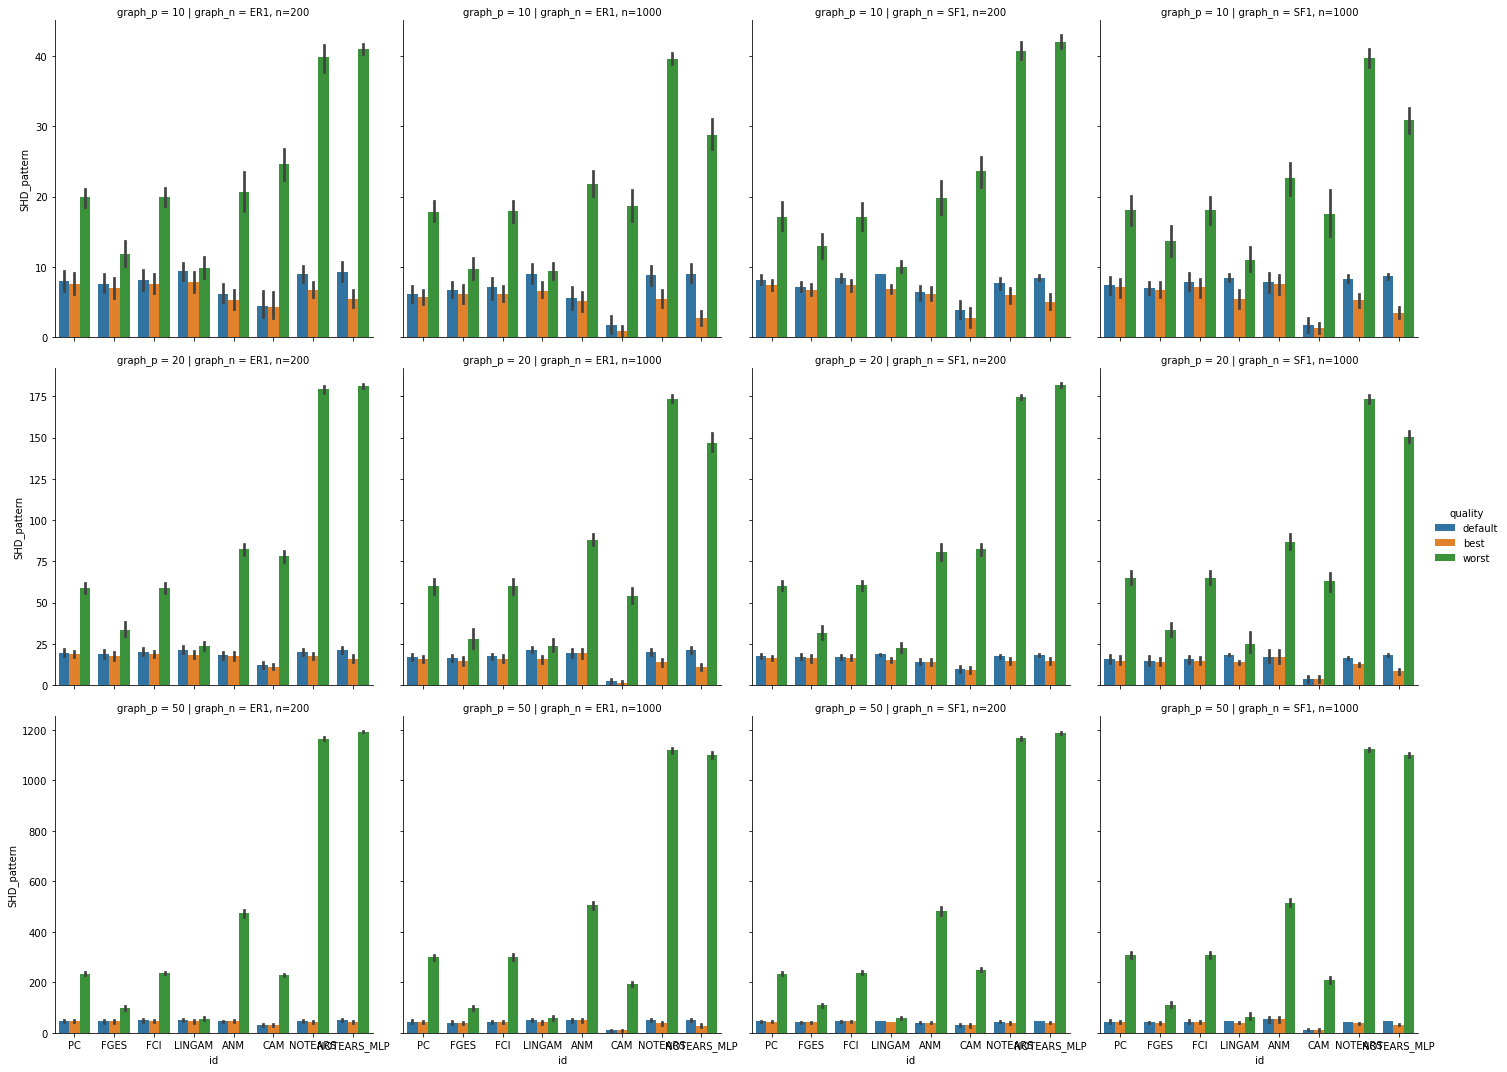

SEM = gp, d = 4


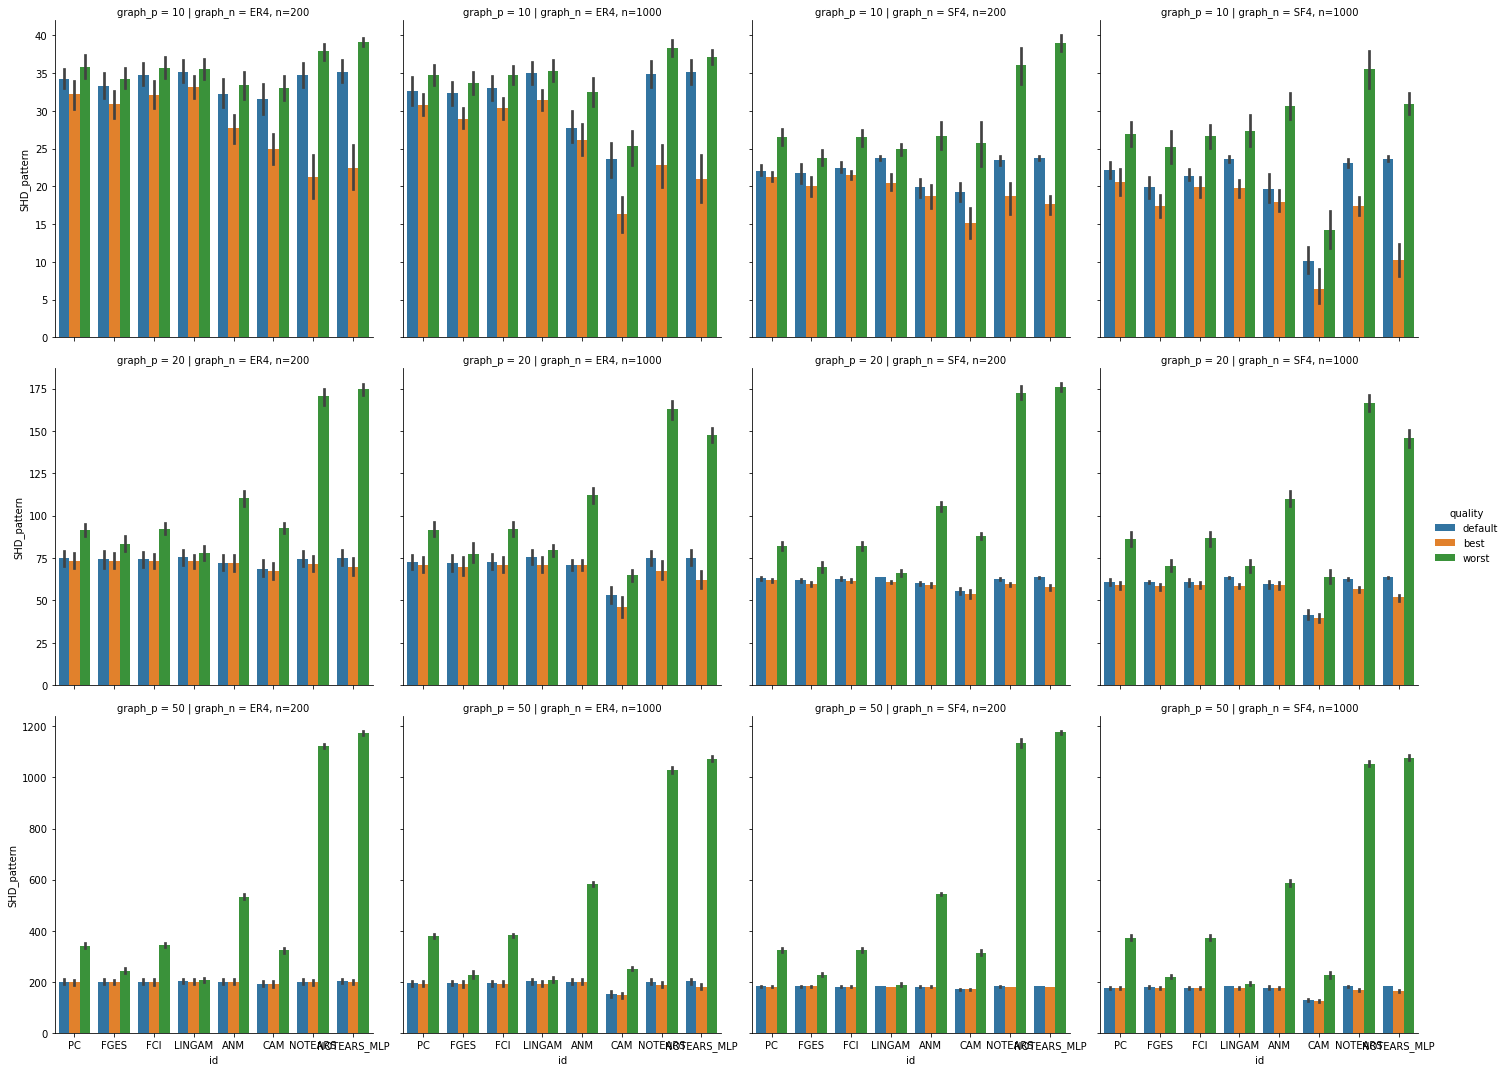

SEM = gumbel, d = 1


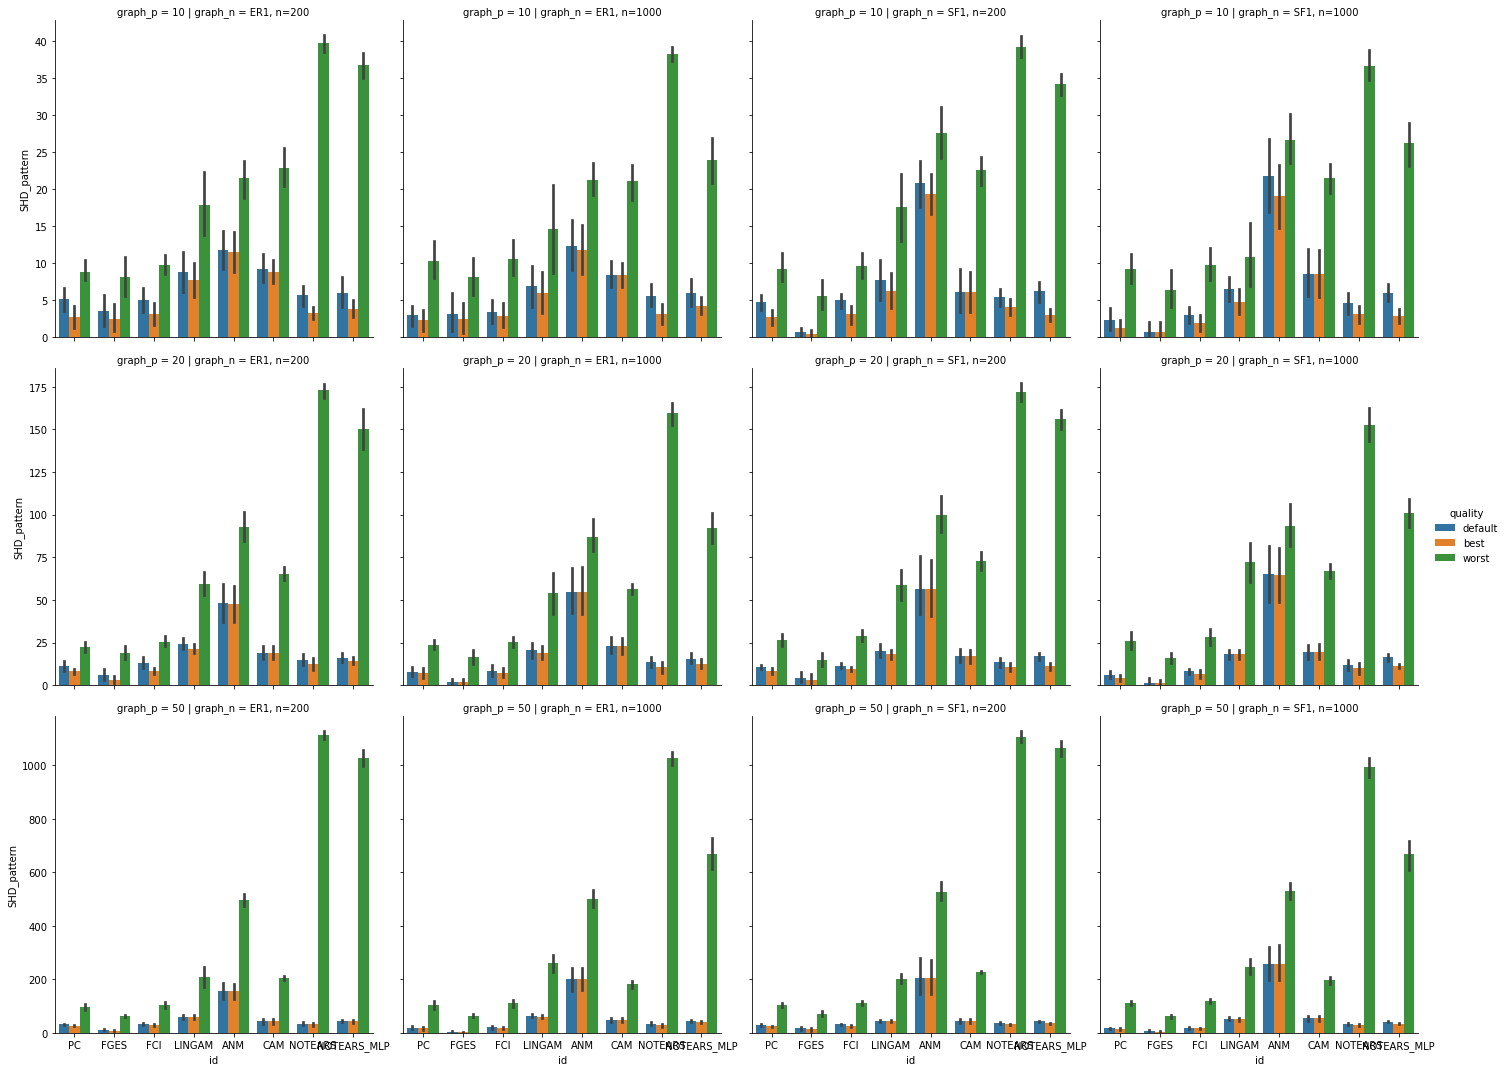

SEM = gumbel, d = 4


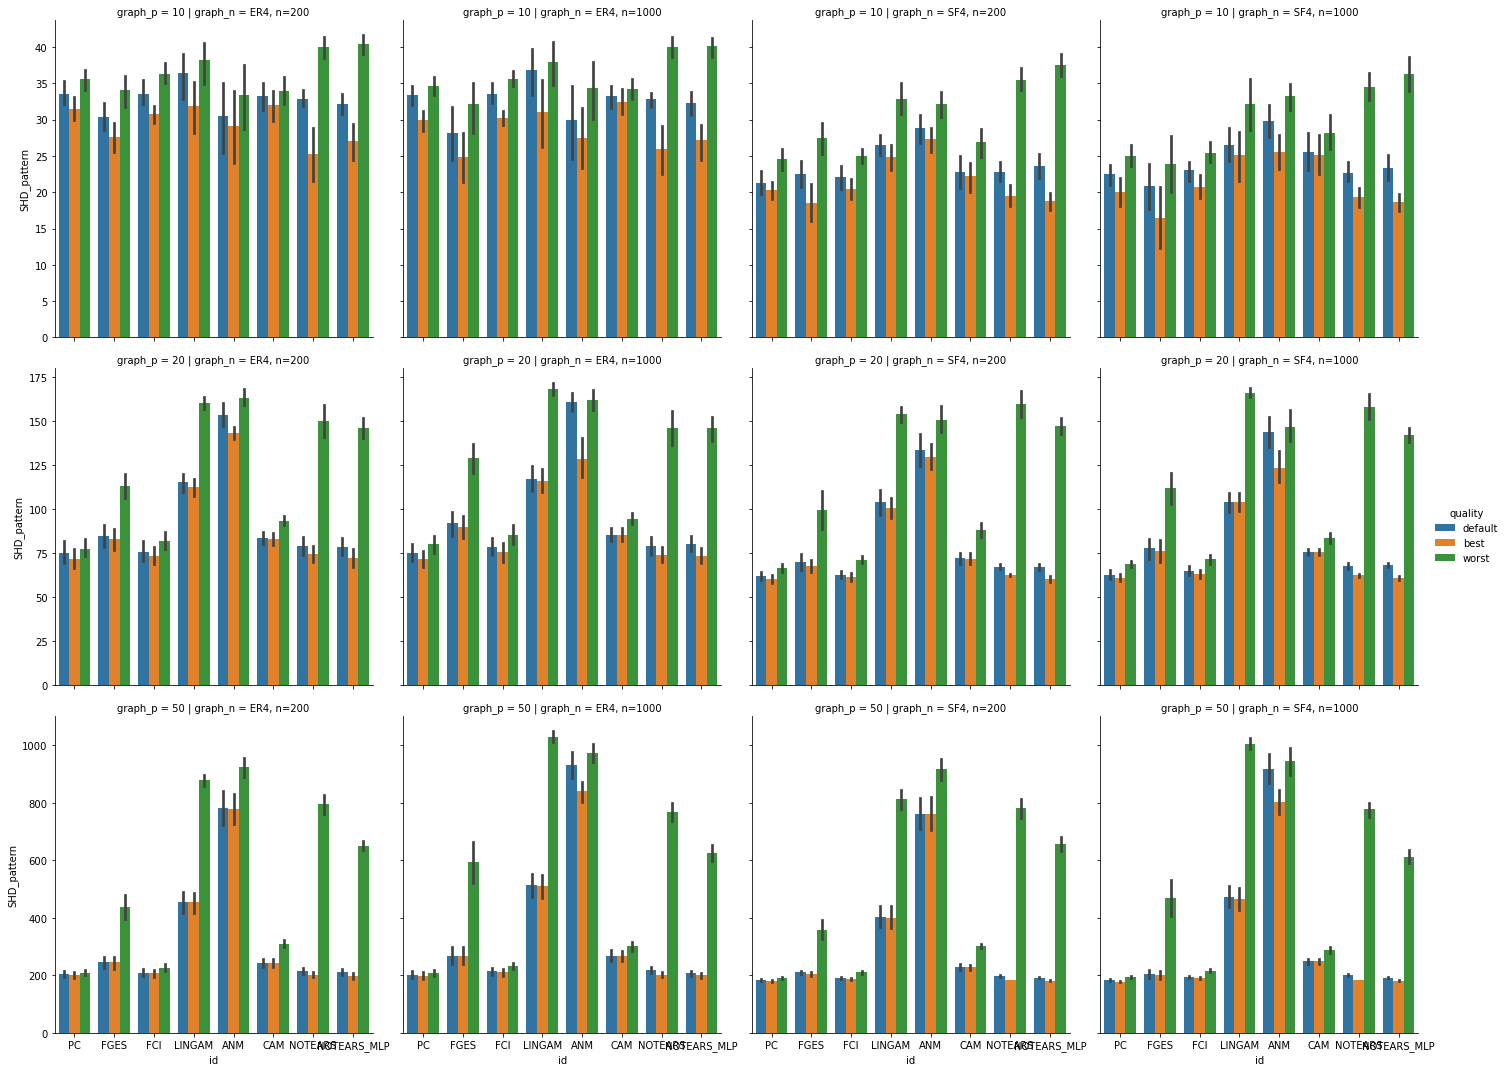

In [13]:
df_plt = df_final.copy()
df_plt['graph_n'] = df_plt.apply(lambda x: f"{x['graph']}, n={x['data_n']}", axis=1)

for sem in ['gp', 'gumbel']:
    for d in [1, 4]:
        print(f'SEM = {sem}, d = {d}')
        df1 = select_2(df_plt, sem, d)
        #sns.catplot(data=df1, x='id', y='SHD', col='graph_n', row='graph_p', hue='quality', kind='bar', ci=None, sharey=True)
        sns.catplot(data=df1, x='id', y='SHD_pattern', col='graph_n', row='graph_p', hue='quality', kind='bar', sharey='row')
        plt.show()

## Alt plots

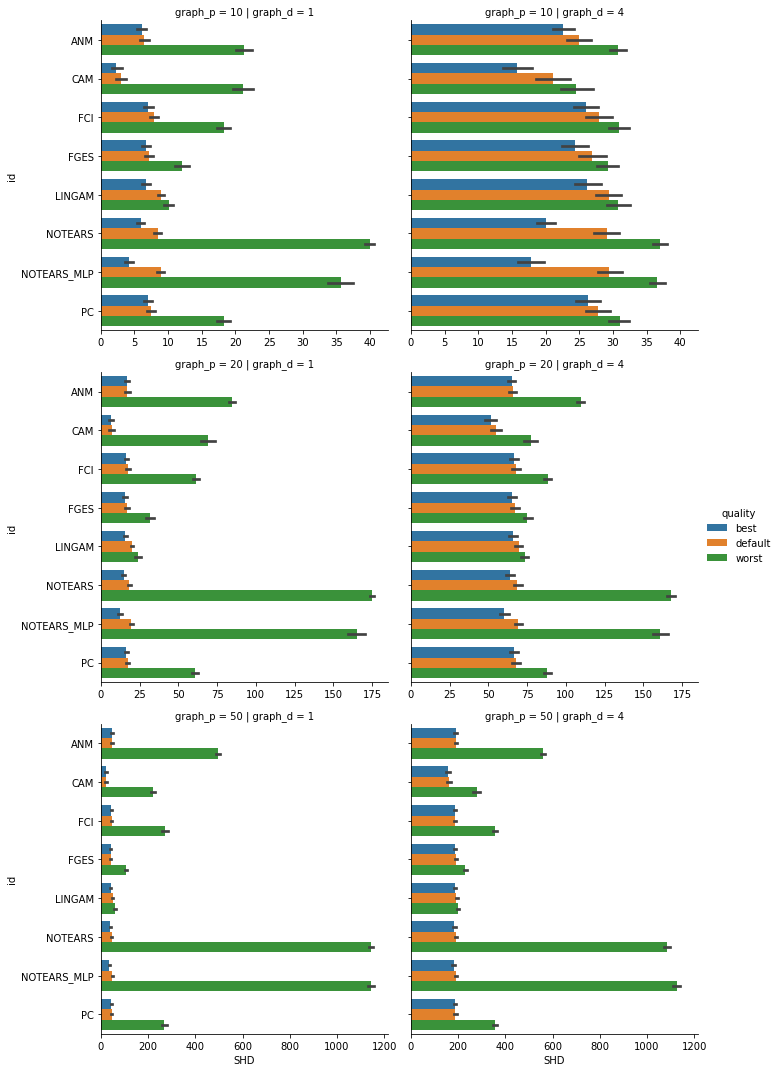

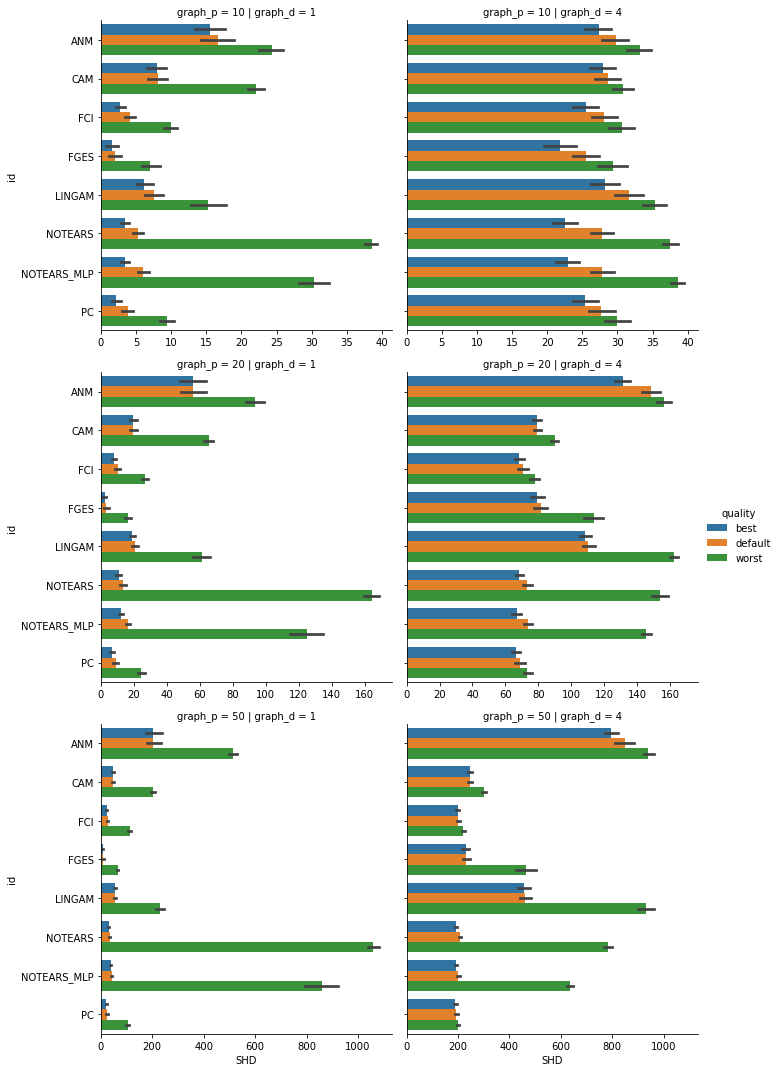

In [20]:
df_plt = df_final.copy()

for sem in ['gp', 'gumbel']:
    df1 = df_plt.loc[df_plt['data_sem'] == sem]
    sns.catplot(data=df1, y='id', x='SHD', col='graph_d', row='graph_p', hue='quality', kind='bar', orient='h', sharex='row')
    plt.show()

## Alt plots take 2

In [10]:
import matplotlib.pylab as pylab

params = {'axes.titlesize': 10,
          'font.size': 12}
pylab.rcParams.update(params)

### SHD

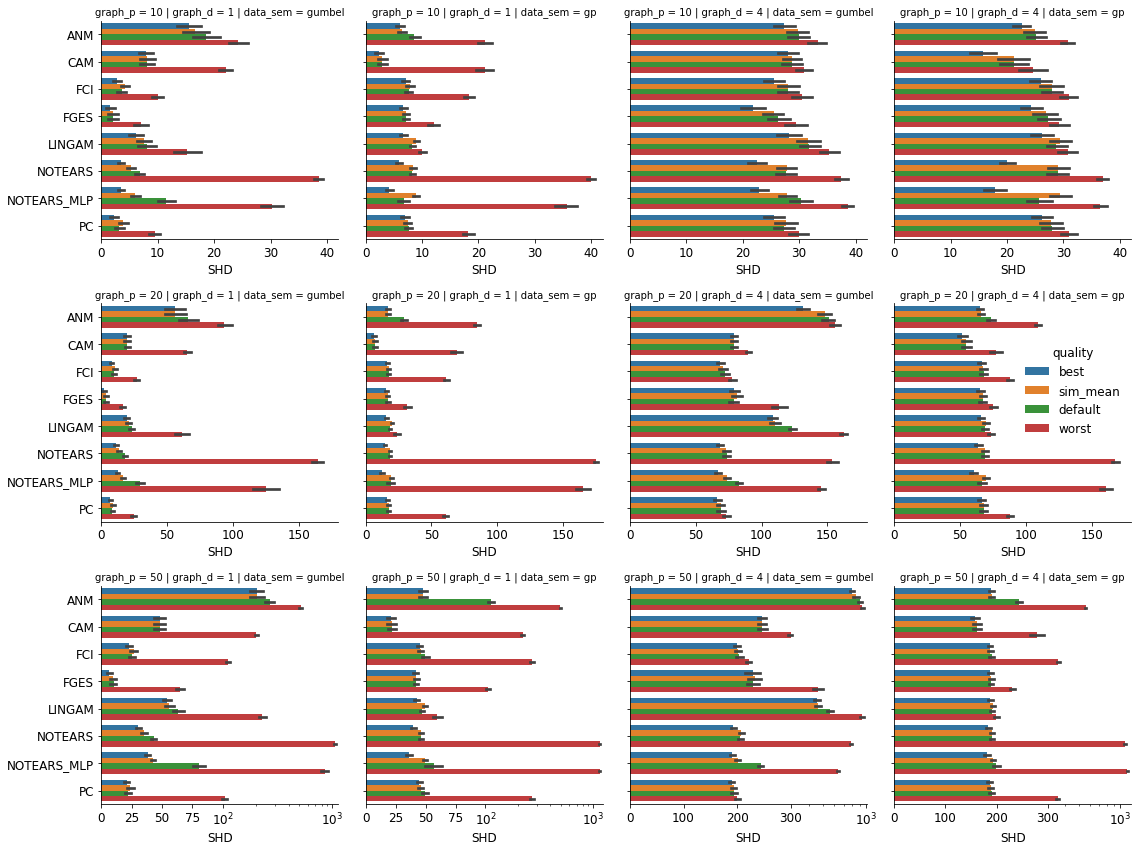

In [11]:
df_plt = df_final.copy()

fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(16, 12))
axs = axs.flatten()

i=0
for p in [10, 20, 50]:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            ax = axs[i]
            df_case = df_plt.loc[(df_plt['graph_p'] == p) & (df_plt['data_sem'] == sem) & (df_plt['graph_d'] == d)]
            
            g = sns.barplot(data=df_case, y='id', x='SHD', hue='quality', orient='h', ax=ax)

            #ax.set_title(f'graph_p = {p} | data_sem = {sem} | graph_d = {d}')
            ax.set_title(f'graph_p = {p} | graph_d = {d} | data_sem = {sem}')
            ax.set_ylabel('')
            ax.spines[['right', 'top']].set_visible(False)

            if i == 7: # last entry
                sns.move_legend(ax, loc='center right', bbox_to_anchor=(1.0, 0.6), frameon=False)
            else:
                ax.get_legend().remove()

            if p == 10:
                ax.set_xlim(0, 42)
            if p == 20:
                ax.set_xlim(0, 180)
            if p == 50 and d == 1:
                ax.set_xscale('symlog', linthresh=1e2, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 25, 50, 75, 1e2, 1e3], labels=[0, 25, 50, 75, '$10^2$', '$10^3$'])
            if p == 50 and d == 4:
                ax.set_xscale('symlog', linthresh=300, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 100, 200, 300, 1e3], labels=[0, 100, 200, 300, '$10^3$'])

            i += 1

plt.tight_layout()
plt.savefig('./plots/hyper_qual/hq_grid_abs.pdf', dpi=1000)

### FP

In [13]:
metric = 'FP_skel'

df_def_fp = ut.def_h('../config/algos_repo.json', './results/sim', metric)
df_def_fp['id'] = df_def_fp.apply(lambda x: x['id'].upper(), axis=1)
df_best_fp = ut.best_h(bench_all, metric)
df_worst_fp = ut.worst_h(bench_all, metric)

df_best_fp['quality'] = 'best'
df_def_fp['quality'] = 'sim_mean'
df_paper_def['quality'] = 'default'
df_worst_fp['quality'] = 'worst'

df_final_fp = pd.concat([df_best_fp, df_def_fp, df_paper_def, df_worst_fp], axis=0)
df_final_fp = df_final_fp.reset_index()

df_final_fp['graph'] = df_final_fp.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df_final_fp['FP'] = df_final_fp[metric]

/home/damian/code/benchpress-dm/hyperparams/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['id'] = df['id'].unique()[0]


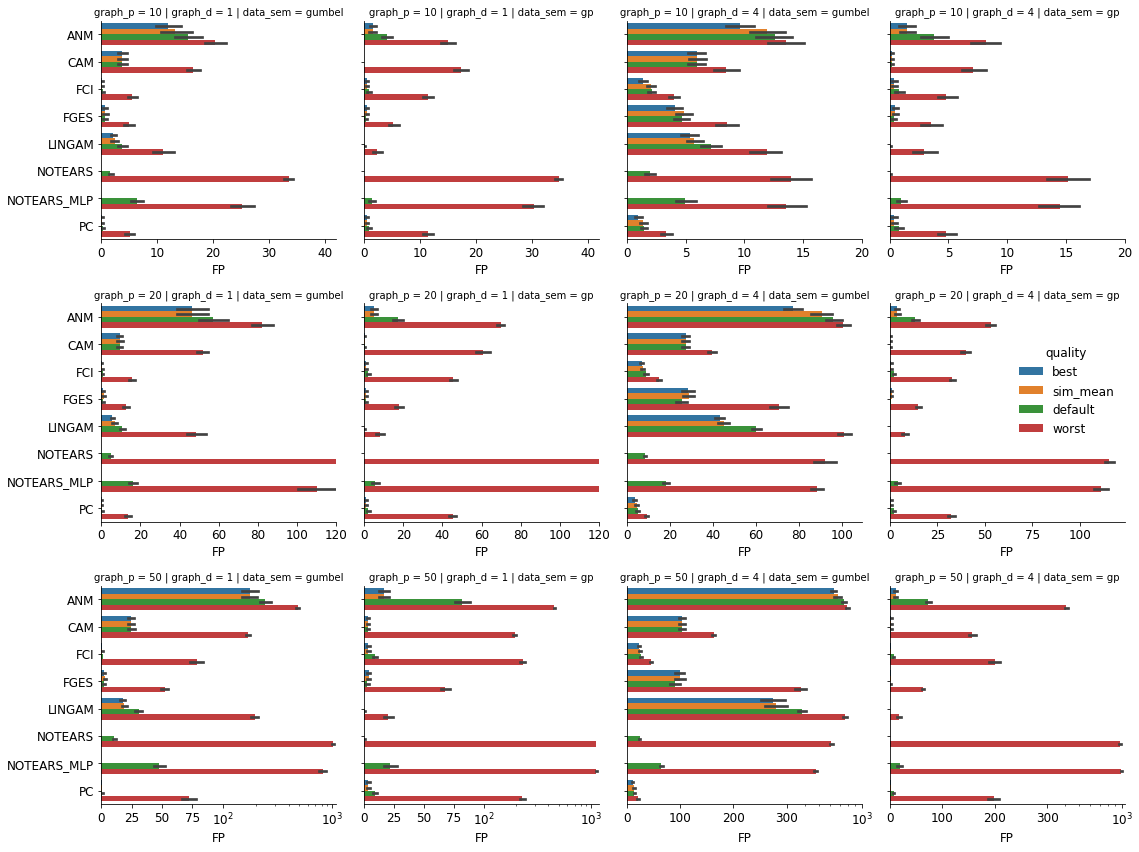

In [30]:
df_plt = df_final_fp.copy()

fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(16, 12))
axs = axs.flatten()

i=0
for p in [10, 20, 50]:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            ax = axs[i]
            df_case = df_plt.loc[(df_plt['graph_p'] == p) & (df_plt['data_sem'] == sem) & (df_plt['graph_d'] == d)]
            
            g = sns.barplot(data=df_case, y='id', x='FP', hue='quality', orient='h', ax=ax)

            #ax.set_title(f'graph_p = {p} | data_sem = {sem} | graph_d = {d}')
            ax.set_title(f'graph_p = {p} | graph_d = {d} | data_sem = {sem}')
            ax.set_ylabel('')
            ax.spines[['right', 'top']].set_visible(False)

            if i == 7: # last entry
                sns.move_legend(ax, loc='center right', bbox_to_anchor=(1.0, 0.6), frameon=False)
            else:
                ax.get_legend().remove()

            if p == 10 and d == 1:
                ax.set_xlim(0, 42)
            if p == 10 and d == 4:
                ax.set_xlim(0, 20)
            if p == 20 and d == 1:
                ax.set_xlim(0, 180)
            if p == 20 and d == 1:
                ax.set_xlim(0, 120)
            if p == 50 and d == 1:
                ax.set_xscale('symlog', linthresh=1e2, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 25, 50, 75, 1e2, 1e3], labels=[0, 25, 50, 75, '$10^2$', '$10^3$'])
            if p == 50 and d == 4:
                ax.set_xscale('symlog', linthresh=300, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 100, 200, 300, 1e3], labels=[0, 100, 200, 300, '$10^3$'])

            i += 1

plt.tight_layout()
plt.savefig('./plots/hyper_qual/hq_grid_fp.pdf', dpi=1000)

### FN

In [17]:
metric = 'FN_skel'

df_def_fn = ut.def_h('../config/algos_repo.json', './results/sim', metric)
df_def_fn['id'] = df_def_fn.apply(lambda x: x['id'].upper(), axis=1)
df_best_fn = ut.best_h(bench_all, metric)
df_worst_fn = ut.worst_h(bench_all, metric)

df_best_fn['quality'] = 'best'
df_def_fn['quality'] = 'sim_mean'
df_paper_def['quality'] = 'default'
df_worst_fn['quality'] = 'worst'

df_final_fn = pd.concat([df_best_fn, df_def_fn, df_paper_def, df_worst_fn], axis=0)
df_final_fn = df_final_fn.reset_index()

df_final_fn['graph'] = df_final_fn.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df_final_fn['FN'] = df_final_fn[metric]

/home/damian/code/benchpress-dm/hyperparams/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['id'] = df['id'].unique()[0]


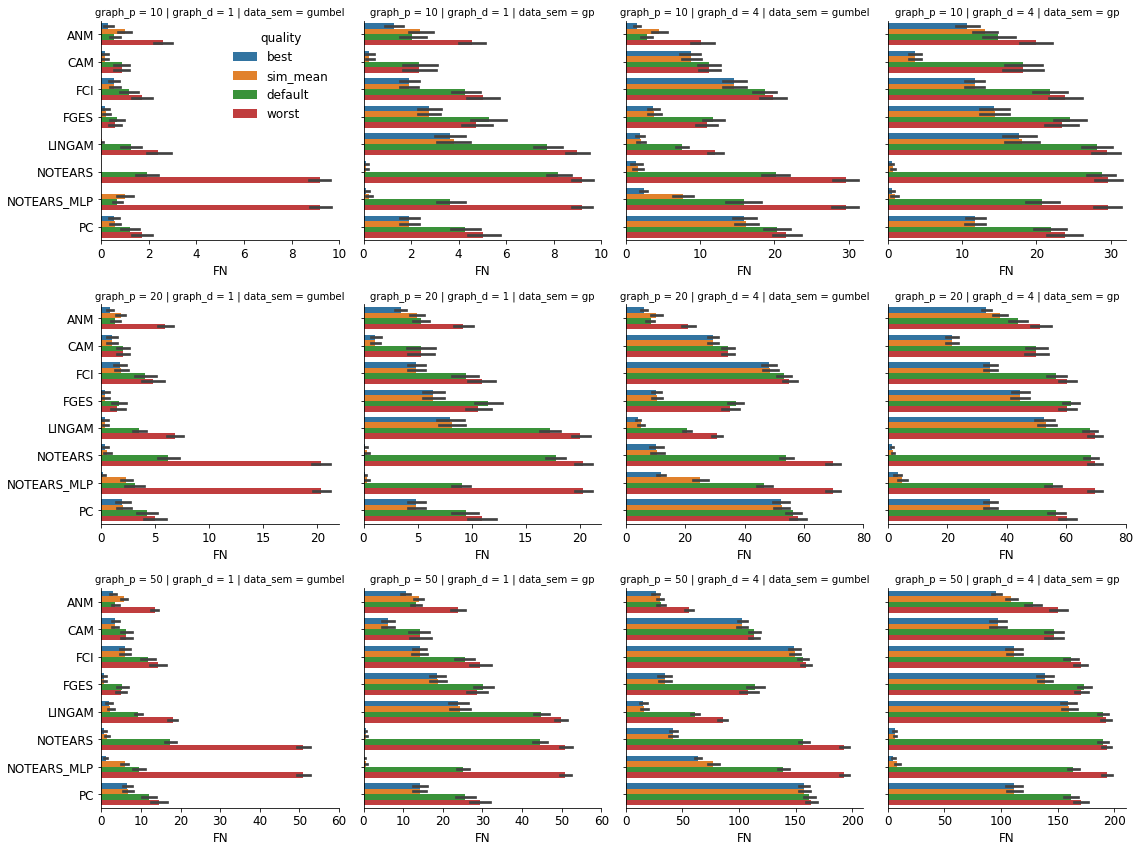

In [28]:
df_plt = df_final_fn.copy()

fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(16, 12))
axs = axs.flatten()

i=0
for p in [10, 20, 50]:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            ax = axs[i]
            df_case = df_plt.loc[(df_plt['graph_p'] == p) & (df_plt['data_sem'] == sem) & (df_plt['graph_d'] == d)]
            
            g = sns.barplot(data=df_case, y='id', x='FN', hue='quality', orient='h', ax=ax)

            #ax.set_title(f'graph_p = {p} | data_sem = {sem} | graph_d = {d}')
            ax.set_title(f'graph_p = {p} | graph_d = {d} | data_sem = {sem}')
            ax.set_ylabel('')
            ax.spines[['right', 'top']].set_visible(False)

            if i == 0: # last entry
                sns.move_legend(ax, loc='upper right', bbox_to_anchor=(1.0, 1.0), frameon=False)
            else:
                ax.get_legend().remove()

            if p == 10 and d == 1:
                ax.set_xlim(0, 10)
            if p == 10 and d == 4:
                ax.set_xlim(0, 32)
            if p == 20 and d == 1:
                ax.set_xlim(0, 22)
            if p == 20 and d == 4:
                ax.set_xlim(0, 80)
            if p == 50 and d == 1:
                #ax.set_xscale('symlog', linthresh=1e2, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                #ax.set_xticks([0, 25, 50, 75, 1e2, 1e3], labels=[0, 25, 50, 75, '$10^2$', '$10^3$'])
                ax.set_xlim(0, 60)
            if p == 50 and d == 4:
                #ax.set_xscale('symlog', linthresh=300, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                #ax.set_xticks([0, 100, 200, 300, 1e3], labels=[0, 100, 200, 300, '$10^3$'])
                ax.set_xlim(0, 210)

            i += 1

plt.tight_layout()
plt.savefig('./plots/hyper_qual/hq_grid_fn.pdf', dpi=1000)

### All (p=10, d=1)

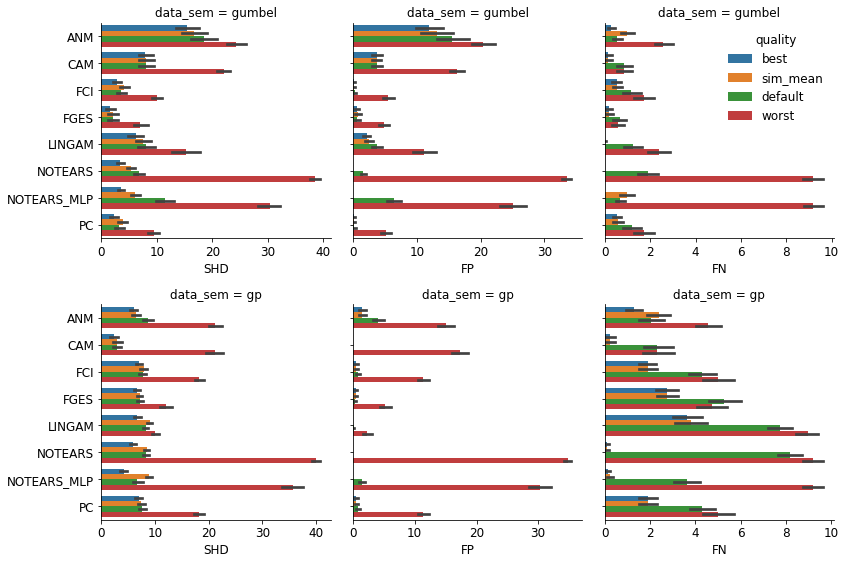

In [36]:
import matplotlib.pylab as pylab

params = {'axes.titlesize': 12,
          'font.size': 12}
pylab.rcParams.update(params)

def update_ax(ax, sem, no_legend=True):
    ax.set_title(f'data_sem = {sem}')
    ax.set_ylabel('')
    ax.spines[['right', 'top']].set_visible(False)
    if no_legend:
        ax.get_legend().remove()

fig, axs = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(12, 8))
axs = axs.flatten()

sem = 'gumbel'
ax = axs[0]
df_case = df_final.loc[(df_final['graph_p'] == 10) & (df_final['data_sem'] == sem) & (df_final['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='SHD', hue='quality', orient='h', ax=ax)
update_ax(ax, sem)

ax = axs[1]
df_case = df_final_fp.loc[(df_final_fp['graph_p'] == 10) & (df_final_fp['data_sem'] == sem) & (df_final_fp['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='FP', hue='quality', orient='h', ax=ax)
update_ax(ax, sem)

ax = axs[2]
df_case = df_final_fn.loc[(df_final_fn['graph_p'] == 10) & (df_final_fn['data_sem'] == sem) & (df_final_fn['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='FN', hue='quality', orient='h', ax=ax)
update_ax(ax, sem, False)
sns.move_legend(ax, loc='upper right', bbox_to_anchor=(1.0, 1.0), frameon=False)


sem = 'gp'
ax = axs[3]
df_case = df_final.loc[(df_final['graph_p'] == 10) & (df_final['data_sem'] == sem) & (df_final['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='SHD', hue='quality', orient='h', ax=ax)
update_ax(ax, sem)

ax = axs[4]
df_case = df_final_fp.loc[(df_final_fp['graph_p'] == 10) & (df_final_fp['data_sem'] == sem) & (df_final_fp['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='FP', hue='quality', orient='h', ax=ax)
update_ax(ax, sem)

ax = axs[5]
df_case = df_final_fn.loc[(df_final_fn['graph_p'] == 10) & (df_final_fn['data_sem'] == sem) & (df_final_fn['graph_d'] == 1)]
g = sns.barplot(data=df_case, y='id', x='FN', hue='quality', orient='h', ax=ax)
update_ax(ax, sem)



plt.tight_layout()
plt.savefig('./plots/hyper_qual/hq_grid_all.pdf', dpi=1000)

### diff

In [17]:
merge_key = ['graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n', 'replicate', 'id']
df_best_def = df_best.merge(df_def, on=merge_key, suffixes=('_best', '_def'))
df_def_worst = df_def.merge(df_worst, on=merge_key, suffixes=('_def', '_worst'))

In [18]:
df_best_def['delta_SHD'] = df_best_def['SHD_pattern_def'] - df_best_def['SHD_pattern_best']
df_best_def['change'] = '$SHD_{sim\_mean}-SHD_{best}$'

df_def_worst['delta_SHD'] = df_def_worst['SHD_pattern_worst'] - df_def_worst['SHD_pattern_def']
df_def_worst['change'] = '$SHD_{worst}-SHD_{sim\_mean}$'

df_final = pd.concat([df_best_def, df_def_worst], axis=0).reset_index()

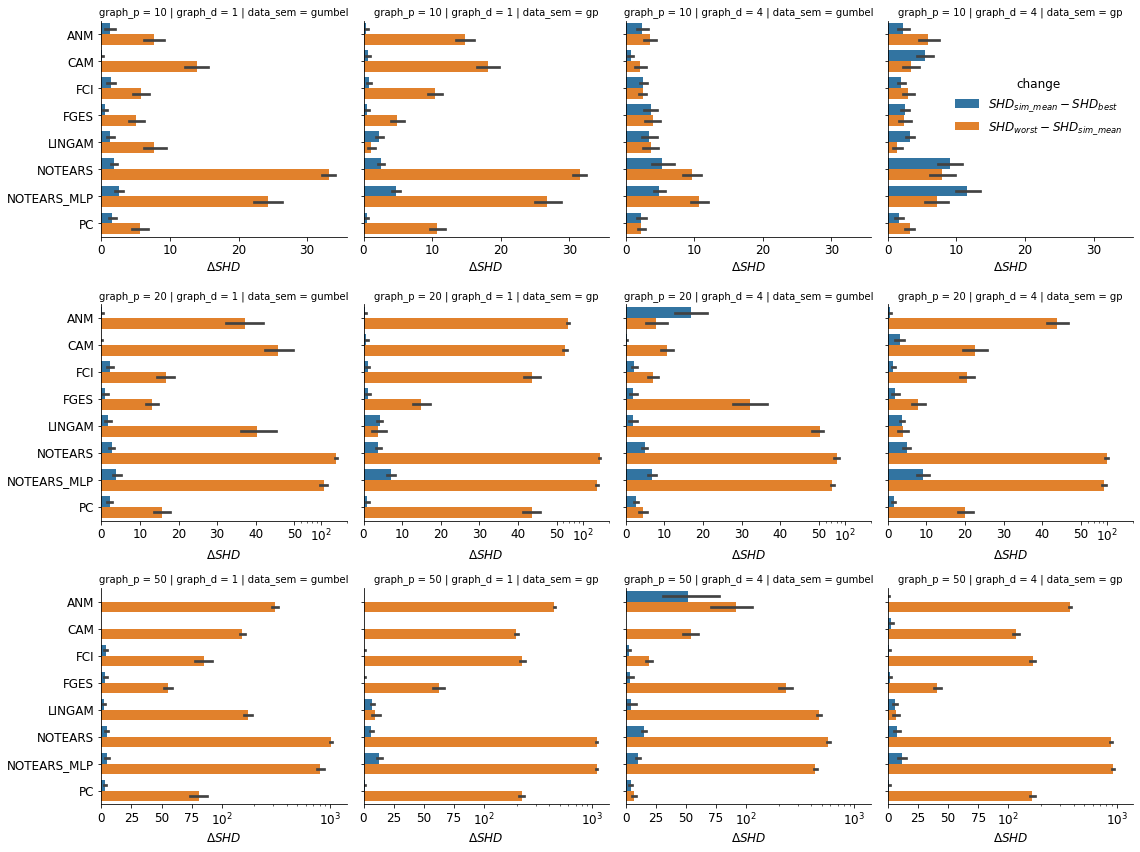

In [20]:
df_plt = df_final.copy()

fig, axs = plt.subplots(3, 4, sharex='row', sharey=True, figsize=(16, 12))
axs = axs.flatten()

i=0
for p in [10, 20, 50]:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            ax = axs[i]
            df_case = df_plt.loc[(df_plt['graph_p'] == p) & (df_plt['data_sem'] == sem) & (df_plt['graph_d'] == d)]
            
            g = sns.barplot(data=df_case, y='id', x='delta_SHD', hue='change', orient='h', ax=ax)

            #ax.set_title(f'graph_p = {p} | data_sem = {sem} | graph_d = {d}')
            ax.set_title(f'graph_p = {p} | graph_d = {d} | data_sem = {sem}')
            ax.set_ylabel('')
            ax.set_xlabel('$\Delta SHD$')
            ax.spines[['right', 'top']].set_visible(False)

            if i == 3: # last entry
                sns.move_legend(ax, loc='center right', bbox_to_anchor=(1.0, 0.6), frameon=False)
            else:
                ax.get_legend().remove()

            if p == 50 and d in [1, 4]:
                ax.set_xscale('symlog', linthresh=1e2, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 25, 50, 75, 1e2, 1e3], labels=[0, 25, 50, 75, '$10^2$', '$10^3$'])
            if p == 20:
                ax.set_xscale('symlog', linthresh=50, linscale=2.0, subs=[2, 3, 4, 5, 6, 7, 8, 9])
                ax.set_xticks([0, 10, 20, 30, 40, 50, 1e2, 1e3], labels=[0, 10, 20, 30, 40, 50, '$10^2$', '$10^3$'])
                ax.set_xlim(0, 2*1e2)

            i += 1

plt.tight_layout()
plt.savefig('./plots/hyper_qual/hq_grid_diff.pdf', dpi=1000)

## Tables

In [7]:
df_best['best'] = df_best.apply(lambda x: f"{x['mean']} ({x['sem']:.2f})", axis=1)
df_best.drop(columns=['sem'], inplace=True)

df_defs['default'] = df_defs.apply(lambda x: f"{x['SHD_mean']} ({x['SHD_sem']:.2f})", axis=1)

df_worst['worst'] = df_worst.apply(lambda x: f"{x['mean']} ({x['sem']:.2f})", axis=1)
df_worst.drop(columns=['sem'], inplace=True)

merge_key = ['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n']
df_final = df_best.merge(df_defs, on=merge_key).merge(df_worst, on=merge_key)

df_final['graph_type_d'] = df_final.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df_final['id'] = df_final.apply(lambda x: x['id'].upper(), axis=1)

In [8]:
def select(df, gtd, p, sem, n):
    return df.loc[(df['graph_type_d'] == gtd) & (df['data_sem'] == sem) & (df['data_n'] == n) & (df['graph_p'] == p), ['id', 'best', 'default', 'worst']]

def select_across_n(df, gt, d, p, sem):
    gtd = f'{gt.upper()}{d}'
    df1 = select(df, gtd, p, sem, 200).merge(select(df, gtd, p, sem, 1000), on='id', suffixes=['_200', '_1000'])

    df1.set_index('id', inplace=True)

    df1.columns = pd.MultiIndex.from_tuples([(f"n={c.split('_')[1]}", c.split('_')[0]) for c in df1.columns])

    return df1

def create_mi(df, p):
    return pd.MultiIndex.from_tuples([(p, c) for c in df.columns])

def select_across_p(df, gt, d, n, sem):
    gtd = f'{gt.upper()}{d}'
    df10 = select(df, gtd, 10, sem, n).set_index('id')
    df20 = select(df, gtd, 20, sem, n).set_index('id')
    df50 = select(df, gtd, 50, sem, n).set_index('id')

    for dfx, p in zip([df10, df20, df50], [10, 20, 50]):
        dfx.columns = create_mi(dfx, f'p={p}')

    return df10.merge(df20, on='id').merge(df50, on='id')

### Across n

In [9]:
for gt in ['er', 'sf']:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            for p in [10, 20, 50]:
                print()
                print('='*30)
                print(f"{gt.upper()}{d}, {sem}, p={p}")
                display(select_across_n(df_final, gt, d, p, sem))
                print()


ER1, gumbel, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          11.6 (1.41)  11.8 (1.37)  21.6 (1.31)  11.8 (1.78)  12.3 (1.78)   
CAM           8.8 (0.92)   9.3 (1.05)  22.9 (1.37)   8.4 (0.92)   8.4 (0.92)   
FCI           3.1 (0.82)   5.1 (0.94)   9.8 (0.70)   2.9 (0.92)   3.4 (0.83)   
FGES          2.5 (1.05)   3.6 (1.11)   8.1 (1.44)   2.5 (1.07)   3.1 (1.35)   
LINGAM        7.7 (1.31)   8.8 (1.44)  17.9 (2.33)   6.0 (1.58)   6.9 (1.54)   
NOTEARS       3.3 (0.45)   5.7 (0.76)  39.8 (0.65)   3.2 (0.71)   5.6 (0.82)   
NOTEARS_MLP   3.8 (0.66)   6.0 (1.03)  36.8 (0.92)   4.2 (0.65)   6.0 (1.02)   
PC            2.7 (0.79)   5.2 (0.89)   8.9 (0.72)   2.3 (0.79)   3.0 (0.71)   

                          
                   worst  
id                        
ANM          21.3 (1.14)  
CAM          21.1 (1.26)  
FCI          10.6 (1.28)  
FGES          8.1 (1.43)  
LINGAM       14.7 (3.13)  
NOTEARS      38.3 (0.56)  
NOTEARS_MLP  24.0 (1.69)  
PC           10.3 (1.36)



ER1, gumbel, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          47.8 (5.87)  47.9 (5.90)   92.7 (4.56)  54.4 (7.62)  54.7 (7.61)   
CAM          19.0 (2.04)  19.1 (2.04)   65.2 (2.05)  23.0 (2.56)  23.0 (2.56)   
FCI           8.4 (1.11)  13.1 (1.78)   25.5 (1.60)   7.1 (1.67)   8.3 (1.81)   
FGES          3.2 (1.06)   5.7 (1.74)   19.0 (2.07)   1.8 (0.90)   1.8 (0.90)   
LINGAM       21.4 (1.33)  24.4 (1.83)   59.5 (3.63)  19.0 (2.12)  20.4 (2.38)   
NOTEARS      12.5 (1.75)  15.0 (1.81)  173.3 (2.39)  10.4 (1.87)  13.5 (1.65)   
NOTEARS_MLP  14.2 (1.09)  16.2 (1.37)  150.3 (6.17)  12.6 (1.42)  15.6 (1.67)   
PC            8.0 (0.91)  11.2 (1.50)   22.3 (1.67)   6.9 (1.45)   7.8 (1.44)   

                           
                    worst  
id                         
ANM           87.1 (5.19)  
CAM           56.6 (1.61)  
FCI           25.2 (1.57)  
FGES          16.3 (2.21)  
LINGAM        53.9 (6.34)  
NOTEARS      159.5 (3.42)  
NOTEARS_MLP   92.2 (4.61)  
PC            23.7 (1.42)



ER1, gumbel, p=50


n=200                                        n=1000  \
                      best        default           worst           best   
id                                                                         
ANM          155.2 (15.38)  155.2 (15.38)   497.9 (11.39)  200.3 (23.35)   
CAM            43.5 (4.81)    43.5 (4.81)    205.2 (4.10)    48.6 (4.10)   
FCI            29.7 (1.56)    34.6 (2.02)    105.0 (5.35)    18.6 (2.30)   
FGES            8.1 (1.21)    12.6 (1.61)     63.2 (2.08)     2.4 (0.90)   
LINGAM         59.1 (4.20)    60.6 (4.19)   210.2 (19.22)    60.0 (3.65)   
NOTEARS        32.0 (3.22)    34.8 (2.81)   1112.1 (8.18)    29.2 (3.04)   
NOTEARS_MLP    42.8 (2.47)    44.3 (2.24)  1027.9 (16.25)    40.1 (2.08)   
PC             27.3 (1.09)    31.4 (1.45)     98.0 (6.18)    16.6 (2.66)   

                                            
                   default           worst  
id                                          
ANM          200.4 (23.37)   500.4 (16.76)  
CAM            48.6 (4.10)    182.1 (6.54)  
FCI            20.5 (2.38)    110.3 (6.91)  
FGES            3.5 (1.11)     63.9 (2.84)  
LINGAM         64.3 (3.43)   260.4 (17.95)  
NOTEARS        34.9 (2.79)  1026.0 (13.90)  
NOTEARS_MLP    42.9 (2.12)   668.5 (30.31)  
PC             19.9 (3.01)    104.8 (7.15)



ER1, gp, p=10


n=200                               n=1000              \
                   best     default        worst        best     default   
id                                                                         
ANM          5.3 (0.79)  6.1 (0.72)  20.6 (1.40)  5.1 (0.71)  5.6 (0.85)   
CAM          4.3 (1.01)  4.5 (1.00)  24.7 (1.21)  0.9 (0.38)  1.7 (0.65)   
FCI          7.6 (0.76)  8.1 (0.78)  19.9 (0.67)  6.2 (0.59)  7.1 (0.77)   
FGES         7.0 (0.77)  7.6 (0.73)  11.8 (0.96)  6.1 (0.69)  6.8 (0.57)   
LINGAM       7.8 (0.76)  9.4 (0.67)   9.8 (0.81)  6.6 (0.56)  9.0 (0.70)   
NOTEARS      6.8 (0.57)  9.0 (0.67)  39.9 (1.02)  5.5 (0.65)  8.8 (0.71)   
NOTEARS_MLP  5.5 (0.64)  9.3 (0.72)  41.0 (0.37)  2.7 (0.54)  9.0 (0.70)   
PC           7.6 (0.76)  8.0 (0.77)  19.9 (0.67)  5.8 (0.55)  6.1 (0.64)   

                          
                   worst  
id                        
ANM          21.8 (0.99)  
CAM          18.7 (1.19)  
FCI          17.9 (0.82)  
FGES          9.7 (0.76)  
LINGAM        9.5 (0.65)  
NOTEARS      39.6 (0.45)  
NOTEARS_MLP  28.8 (1.24)  
PC           17.8 (0.81)



ER1, gp, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          17.5 (1.22)  18.1 (1.22)   82.4 (1.91)  19.3 (1.32)  19.5 (1.28)   
CAM          11.2 (0.92)  12.4 (0.87)   78.1 (1.86)   1.5 (0.52)   2.2 (0.74)   
FCI          18.8 (1.06)  20.1 (1.13)   59.1 (1.69)  15.7 (1.15)  17.4 (0.90)   
FGES         17.8 (1.35)  18.9 (1.30)   33.7 (2.37)  14.6 (1.24)  16.4 (1.05)   
LINGAM       18.3 (1.08)  21.3 (1.15)   23.6 (1.25)  15.8 (1.09)  21.5 (1.01)   
NOTEARS      17.6 (1.08)  20.1 (1.06)  179.2 (1.20)  13.8 (1.11)  20.0 (1.07)   
NOTEARS_MLP  16.1 (1.02)  21.1 (1.09)  181.2 (0.57)  11.0 (1.02)  21.0 (0.95)   
PC           18.6 (1.06)  19.5 (1.19)   58.7 (1.65)  15.8 (1.06)  16.8 (0.98)   

                           
                    worst  
id                         
ANM           88.2 (1.80)  
CAM           53.8 (2.52)  
FCI           59.9 (2.49)  
FGES          27.8 (3.28)  
LINGAM        23.7 (2.03)  
NOTEARS      173.6 (0.97)  
NOTEARS_MLP  147.0 (3.00)  
PC            59.9 (2.49)



ER1, gp, p=50


n=200                                   n=1000  \
                    best      default          worst         best   
id                                                                  
ANM          45.4 (2.07)  45.4 (2.07)   474.3 (7.17)  50.1 (3.01)   
CAM          32.1 (2.35)  32.3 (2.34)   230.6 (2.11)  10.5 (1.05)   
FCI          48.1 (2.44)  49.1 (2.43)   237.5 (2.84)  42.9 (2.75)   
FGES         45.2 (2.37)  45.2 (2.37)    99.8 (4.17)  38.8 (2.66)   
LINGAM       45.8 (2.57)  52.1 (2.30)    56.1 (3.03)  41.6 (2.70)   
NOTEARS      44.5 (2.32)  48.4 (2.48)  1165.3 (4.10)  37.5 (2.85)   
NOTEARS_MLP  43.7 (2.20)  51.0 (2.37)  1192.5 (1.54)  28.5 (2.56)   
PC           47.8 (2.31)  48.5 (2.43)   234.6 (2.73)  43.1 (2.77)   

                                         
                 default          worst  
id                                       
ANM          50.3 (3.05)   505.4 (6.74)  
CAM          11.0 (1.01)   192.8 (4.19)  
FCI          43.3 (2.67)   301.6 (5.56)  
FGES         40.2 (2.75)    98.0 (4.42)  
LINGAM       51.8 (2.24)    59.0 (3.80)  
NOTEARS      49.5 (2.20)  1119.7 (5.72)  
NOTEARS_MLP  51.3 (2.26)  1100.4 (5.90)  
PC           44.6 (2.82)   299.3 (5.50)



ER4, gumbel, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          29.1 (2.69)  30.5 (2.58)  33.4 (2.45)  27.5 (2.48)  30.0 (2.70)   
CAM          32.0 (1.16)  33.2 (1.01)  34.0 (1.13)  32.5 (0.93)  33.2 (0.85)   
FCI          30.8 (0.68)  33.6 (0.86)  36.3 (0.73)  30.2 (0.59)  33.6 (0.70)   
FGES         27.6 (1.09)  30.4 (0.99)  34.1 (1.14)  24.9 (1.83)  28.2 (1.95)   
LINGAM       31.9 (1.95)  36.4 (1.63)  38.2 (1.47)  31.0 (2.56)  36.9 (1.63)   
NOTEARS      25.3 (1.97)  32.9 (0.59)  40.0 (0.80)  25.9 (1.75)  32.8 (0.51)   
NOTEARS_MLP  27.1 (1.35)  32.2 (0.76)  40.4 (0.64)  27.2 (1.30)  32.3 (0.83)   
PC           31.5 (0.85)  33.6 (0.87)  35.6 (0.81)  30.0 (0.75)  33.4 (0.73)   

                          
                   worst  
id                        
ANM          34.3 (2.21)  
CAM          34.2 (0.77)  
FCI          35.6 (0.58)  
FGES         32.2 (1.89)  
LINGAM       38.0 (1.63)  
NOTEARS      40.0 (0.76)  
NOTEARS_MLP  40.2 (0.66)  
PC           34.6 (0.69)



ER4, gumbel, p=20


n=200                                    n=1000  \
                     best       default         worst          best   
id                                                                    
ANM          143.2 (1.72)  153.6 (3.61)  163.5 (2.49)  128.4 (5.82)   
CAM           83.1 (1.77)   83.7 (1.84)   93.5 (1.49)   85.5 (1.87)   
FCI           73.5 (2.67)   76.0 (3.01)   82.1 (2.59)   75.5 (2.84)   
FGES          82.9 (3.27)   85.1 (3.36)  113.4 (3.87)   90.1 (3.61)   
LINGAM       112.6 (2.84)  115.5 (2.86)  160.3 (1.96)  116.2 (3.58)   
NOTEARS       74.4 (2.54)   79.0 (2.85)  150.2 (4.92)   74.1 (2.39)   
NOTEARS_MLP   72.4 (2.67)   78.7 (2.58)  146.1 (2.99)   73.4 (2.29)   
PC            71.8 (2.91)   75.0 (3.33)   77.7 (2.68)   71.8 (2.53)   

                                         
                  default         worst  
id                                       
ANM          161.1 (2.85)  162.4 (3.07)  
CAM           85.5 (1.87)   94.6 (1.85)  
FCI           78.6 (2.60)   85.4 (2.91)  
FGES          92.3 (3.62)  129.2 (4.54)  
LINGAM       117.2 (3.81)  168.4 (1.91)  
NOTEARS       79.1 (2.67)  146.1 (5.20)  
NOTEARS_MLP   80.5 (2.30)  146.1 (3.64)  
PC            75.3 (2.72)   80.0 (2.50)



ER4, gumbel, p=50


n=200                                       n=1000  \
                      best        default          worst           best   
id                                                                        
ANM          777.6 (30.79)  781.3 (32.50)  924.5 (17.99)  841.7 (18.44)   
CAM           241.9 (7.28)   241.9 (7.28)   310.9 (6.24)   267.3 (9.44)   
FCI           207.4 (6.47)   208.8 (6.49)   227.2 (5.98)   211.3 (6.74)   
FGES         245.3 (11.14)  245.3 (11.14)  436.9 (23.01)  268.0 (15.92)   
LINGAM       453.9 (20.24)  456.5 (19.85)  880.9 (10.29)  509.8 (21.66)   
NOTEARS       202.1 (4.87)   215.3 (5.91)  794.9 (18.06)   202.1 (4.87)   
NOTEARS_MLP   199.1 (5.26)   212.5 (5.55)   650.5 (9.14)   199.9 (5.28)   
PC            199.7 (5.85)   204.3 (5.79)   209.2 (5.32)   199.5 (6.02)   

                                           
                   default          worst  
id                                         
ANM          931.9 (25.16)  973.1 (17.56)  
CAM           267.4 (9.42)   300.8 (8.64)  
FCI           214.5 (7.07)   231.2 (5.96)  
FGES         268.7 (15.97)  593.0 (37.40)  
LINGAM       514.7 (20.94)  1028.9 (9.95)  
NOTEARS       217.4 (5.42)  768.4 (16.66)  
NOTEARS_MLP   207.7 (4.81)  625.5 (14.38)  
PC            201.9 (6.28)   208.4 (5.86)



ER4, gp, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          27.7 (0.98)  32.2 (0.98)  33.4 (0.93)  26.2 (1.13)  27.8 (1.15)   
CAM          25.0 (1.03)  31.6 (1.10)  33.1 (0.81)  16.4 (1.28)  23.6 (1.20)   
FCI          32.1 (1.00)  34.8 (0.77)  35.7 (0.76)  30.4 (0.72)  33.0 (0.84)   
FGES         30.9 (0.97)  33.3 (0.92)  34.3 (0.72)  29.0 (0.75)  32.4 (0.82)   
LINGAM       33.2 (0.80)  35.2 (0.80)  35.5 (0.75)  31.4 (0.75)  35.0 (0.80)   
NOTEARS      21.3 (1.51)  34.7 (0.88)  37.9 (0.59)  22.8 (1.57)  34.9 (0.91)   
NOTEARS_MLP  22.5 (1.61)  35.2 (0.80)  39.1 (0.28)  21.0 (1.71)  35.1 (0.84)   
PC           32.3 (1.00)  34.3 (0.70)  35.8 (0.81)  30.8 (0.77)  32.7 (1.00)   

                          
                   worst  
id                        
ANM          32.5 (1.05)  
CAM          25.3 (1.24)  
FCI          34.7 (0.62)  
FGES         33.7 (0.79)  
LINGAM       35.3 (0.79)  
NOTEARS      38.4 (0.58)  
NOTEARS_MLP  37.2 (0.49)  
PC           34.7 (0.75)



ER4, gp, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          71.8 (2.37)  72.2 (2.43)  110.4 (2.38)  70.9 (1.56)  71.1 (1.58)   
CAM          67.1 (2.66)  68.7 (2.54)   92.7 (1.65)  46.2 (3.00)  52.9 (2.55)   
FCI          73.2 (2.40)  74.4 (2.41)   92.4 (1.74)  71.1 (2.47)  72.9 (2.36)   
FGES         73.4 (2.53)  74.2 (2.50)   83.4 (2.28)  69.8 (2.89)  71.9 (2.58)   
LINGAM       73.0 (2.27)  75.3 (2.31)   78.0 (2.26)  71.0 (2.36)  75.3 (2.28)   
NOTEARS      71.7 (2.18)  74.7 (2.36)  170.3 (2.62)  67.6 (2.81)  74.9 (2.28)   
NOTEARS_MLP  69.8 (2.83)  75.2 (2.33)  174.5 (1.79)  61.9 (2.86)  75.2 (2.31)   
PC           73.4 (2.38)  74.8 (2.41)   91.8 (1.78)  71.0 (2.49)  72.9 (2.31)   

                           
                    worst  
id                         
ANM          112.2 (2.59)  
CAM           64.8 (1.74)  
FCI           91.9 (2.34)  
FGES          77.6 (2.75)  
LINGAM        79.6 (1.80)  
NOTEARS      162.7 (2.84)  
NOTEARS_MLP  147.5 (2.18)  
PC            91.8 (2.30)



ER4, gp, p=50


n=200                                     n=1000  \
                     best       default          worst          best   
id                                                                     
ANM          200.7 (5.06)  200.7 (5.06)   533.3 (5.15)  200.9 (5.86)   
CAM          189.7 (6.18)  192.3 (5.83)   324.0 (5.55)  147.8 (5.11)   
FCI          198.9 (5.39)  199.3 (5.25)   343.2 (4.27)  191.9 (5.70)   
FGES         199.6 (5.19)  199.9 (5.14)   244.0 (5.57)  191.5 (6.21)   
LINGAM       199.3 (5.10)  202.1 (4.87)   207.1 (4.73)  193.3 (5.48)   
NOTEARS      197.8 (5.17)  200.6 (4.88)  1123.4 (5.25)  188.7 (5.79)   
NOTEARS_MLP  198.7 (5.15)  201.8 (4.88)  1174.9 (3.57)  180.3 (5.27)   
PC           198.7 (5.42)  199.9 (5.44)   340.9 (4.49)  192.0 (5.57)   

                                          
                  default          worst  
id                                        
ANM          200.9 (5.86)   582.0 (4.96)  
CAM          151.9 (5.54)   250.3 (3.29)  
FCI          194.3 (5.55)   381.5 (3.78)  
FGES         195.1 (5.19)   228.5 (6.51)  
LINGAM       201.8 (4.83)   208.4 (5.44)  
NOTEARS      200.0 (4.95)  1029.2 (6.10)  
NOTEARS_MLP  201.7 (4.74)  1073.3 (5.96)  
PC           193.6 (5.35)   380.6 (3.76)



SF1, gumbel, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          19.4 (1.48)  20.8 (1.73)  27.6 (1.89)  19.1 (2.39)  21.8 (2.67)   
CAM           6.1 (1.49)   6.1 (1.49)  22.6 (1.01)   8.5 (1.68)   8.5 (1.68)   
FCI           3.1 (0.67)   5.1 (0.48)   9.7 (0.93)   1.9 (0.59)   3.0 (0.60)   
FGES          0.5 (0.27)   0.7 (0.30)   5.6 (1.05)   0.7 (0.70)   0.7 (0.70)   
LINGAM        6.3 (1.26)   7.8 (1.47)  17.6 (2.46)   4.8 (0.90)   6.6 (0.91)   
NOTEARS       4.1 (0.60)   5.4 (0.60)  39.3 (0.79)   3.2 (0.71)   4.6 (0.78)   
NOTEARS_MLP   3.0 (0.45)   6.2 (0.73)  34.2 (0.84)   2.9 (0.50)   6.0 (0.60)   
PC            2.7 (0.56)   4.8 (0.53)   9.3 (1.02)   1.2 (0.63)   2.4 (0.86)   

                          
                   worst  
id                        
ANM          26.7 (1.70)  
CAM          21.6 (1.06)  
FCI           9.8 (1.09)  
FGES          6.4 (1.30)  
LINGAM       10.8 (2.20)  
NOTEARS      36.7 (1.07)  
NOTEARS_MLP  26.3 (1.50)  
PC            9.3 (1.15)



SF1, gumbel, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          56.5 (9.07)  56.5 (9.07)  100.0 (5.76)  64.8 (8.56)  65.3 (8.70)   
CAM          17.0 (1.99)  17.0 (1.99)   73.1 (2.90)  19.4 (2.27)  19.4 (2.27)   
FCI           9.4 (0.76)  11.5 (0.83)   28.8 (1.84)   6.7 (1.18)   8.0 (0.82)   
FGES          3.2 (1.58)   4.3 (1.60)   14.7 (2.13)   1.0 (0.89)   1.5 (1.28)   
LINGAM       18.1 (1.44)  20.1 (1.97)   58.7 (4.78)  18.0 (1.45)  18.0 (1.45)   
NOTEARS      10.6 (1.17)  13.4 (1.58)  172.2 (3.02)   9.8 (1.57)  12.1 (1.59)   
NOTEARS_MLP  11.4 (1.08)  16.9 (1.10)  155.9 (3.05)  11.1 (0.69)  16.3 (1.23)   
PC            8.0 (0.92)  10.7 (0.70)   26.3 (1.99)   4.2 (0.93)   6.0 (1.14)   

                           
                    worst  
id                         
ANM           93.5 (6.71)  
CAM           66.8 (2.17)  
FCI           28.0 (2.62)  
FGES          15.8 (1.69)  
LINGAM        72.3 (6.47)  
NOTEARS      152.5 (5.30)  
NOTEARS_MLP  100.9 (4.75)  
PC            26.1 (2.69)



SF1, gumbel, p=50


n=200                                        n=1000  \
                      best        default           worst           best   
id                                                                         
ANM          204.0 (34.59)  204.0 (34.59)   527.9 (17.03)  259.0 (34.85)   
CAM            45.8 (3.94)    45.8 (3.94)    228.2 (2.56)    53.9 (5.16)   
FCI            27.1 (1.87)    32.0 (1.65)    112.3 (4.51)    16.6 (1.77)   
FGES           12.8 (2.28)    16.6 (2.54)     71.5 (4.92)     2.8 (1.72)   
LINGAM         45.4 (2.19)    45.6 (2.10)    202.1 (9.83)    50.7 (2.91)   
NOTEARS        31.8 (1.44)    36.6 (1.89)  1106.7 (11.43)    29.2 (1.79)   
NOTEARS_MLP    35.4 (1.21)    42.8 (1.26)  1065.9 (14.32)    34.2 (1.15)   
PC             24.3 (1.12)    28.0 (1.83)    104.9 (4.34)    14.9 (1.46)   

                                           
                   default          worst  
id                                         
ANM          259.0 (34.85)  529.5 (15.45)  
CAM            53.9 (5.16)   196.1 (7.29)  
FCI            19.5 (2.11)   118.7 (4.44)  
FGES            5.6 (2.07)    61.3 (3.03)  
LINGAM         52.8 (2.99)  245.7 (14.18)  
NOTEARS        33.5 (2.15)  993.3 (18.55)  
NOTEARS_MLP    41.2 (0.93)  670.1 (28.68)  
PC             16.5 (1.44)   111.4 (4.61)



SF1, gp, p=10


n=200                               n=1000              \
                   best     default        worst        best     default   
id                                                                         
ANM          6.2 (0.49)  6.4 (0.52)  19.8 (1.21)  7.6 (0.72)  7.8 (0.76)   
CAM          2.8 (0.77)  3.9 (0.67)  23.6 (1.14)  1.3 (0.37)  1.7 (0.52)   
FCI          7.4 (0.43)  8.4 (0.31)  17.1 (1.12)  7.1 (0.71)  7.9 (0.60)   
FGES         6.8 (0.44)  7.2 (0.33)  13.0 (0.94)  6.8 (0.53)  7.0 (0.49)   
LINGAM       6.9 (0.35)  9.0 (0.00)  10.0 (0.39)  5.4 (0.67)  8.5 (0.27)   
NOTEARS      6.0 (0.58)  7.7 (0.42)  40.7 (0.65)  5.3 (0.52)  8.3 (0.26)   
NOTEARS_MLP  5.0 (0.58)  8.5 (0.22)  42.0 (0.52)  3.5 (0.43)  8.7 (0.21)   
PC           7.4 (0.43)  8.2 (0.33)  17.1 (1.12)  7.1 (0.71)  7.5 (0.65)   

                          
                   worst  
id                        
ANM          22.7 (1.23)  
CAM          17.5 (1.71)  
FCI          18.1 (1.04)  
FGES         13.7 (1.21)  
LINGAM       11.0 (0.84)  
NOTEARS      39.7 (0.70)  
NOTEARS_MLP  30.9 (0.91)  
PC           18.1 (1.11)



SF1, gp, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          13.9 (0.92)  14.0 (0.88)   80.7 (2.56)  16.8 (2.24)  17.0 (2.21)   
CAM           9.3 (0.94)   9.9 (0.98)   82.2 (1.97)   3.6 (0.95)   3.8 (1.02)   
FCI          16.6 (0.72)  17.1 (0.72)   60.4 (1.48)  14.9 (1.18)  15.6 (1.16)   
FGES         16.2 (1.15)  17.3 (1.00)   31.7 (2.19)  14.2 (1.32)  14.7 (1.44)   
LINGAM       15.4 (0.62)  18.8 (0.13)   22.7 (1.47)  13.8 (0.53)  18.4 (0.22)   
NOTEARS      14.7 (0.87)  17.4 (0.48)  174.4 (0.81)  12.6 (0.56)  16.5 (0.40)   
NOTEARS_MLP  14.5 (0.91)  18.1 (0.31)  181.8 (0.65)   8.3 (0.88)  18.3 (0.26)   
PC           16.4 (0.70)  17.5 (0.70)   60.3 (1.48)  14.9 (1.29)  15.7 (1.21)   

                           
                    worst  
id                         
ANM           87.0 (2.30)  
CAM           62.9 (2.79)  
FCI           65.2 (2.06)  
FGES          33.7 (2.00)  
LINGAM        24.9 (3.33)  
NOTEARS      173.5 (1.46)  
NOTEARS_MLP  150.5 (1.79)  
PC            65.1 (2.01)



SF1, gp, p=50


n=200                                   n=1000  \
                    best      default          worst         best   
id                                                                  
ANM          41.0 (1.37)  41.0 (1.37)   482.7 (8.27)  53.7 (5.24)   
CAM          30.2 (2.68)  30.2 (2.68)   249.1 (3.11)  12.8 (1.82)   
FCI          45.2 (0.92)  46.1 (0.99)   238.4 (3.00)  44.3 (2.38)   
FGES         41.6 (1.54)  42.0 (1.55)   108.8 (3.15)  40.9 (1.95)   
LINGAM       43.0 (0.83)  47.7 (0.30)    59.4 (2.04)  40.0 (1.58)   
NOTEARS      39.4 (1.21)  43.8 (0.80)  1165.8 (2.82)  37.6 (1.47)   
NOTEARS_MLP  39.5 (1.11)  46.9 (0.46)  1188.5 (1.93)  31.9 (0.97)   
PC           44.5 (0.85)  45.4 (0.98)   234.8 (3.00)  43.7 (2.22)   

                                         
                 default          worst  
id                                       
ANM          53.7 (5.24)   516.0 (7.16)  
CAM          13.1 (1.77)   209.9 (6.11)  
FCI          44.7 (2.40)   308.8 (5.54)  
FGES         41.7 (1.84)   112.4 (5.00)  
LINGAM       47.8 (0.44)    64.5 (6.17)  
NOTEARS      43.8 (0.87)  1123.4 (3.87)  
NOTEARS_MLP  47.5 (0.34)  1099.1 (4.74)  
PC           45.0 (2.39)   308.2 (5.65)



SF4, gumbel, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          27.3 (0.87)  28.8 (1.05)  32.2 (0.99)  25.5 (1.20)  29.8 (1.18)   
CAM          22.2 (1.02)  22.8 (1.19)  26.9 (1.05)  25.1 (1.47)  25.5 (1.39)   
FCI          20.5 (0.76)  22.1 (0.89)  25.0 (0.52)  20.7 (0.82)  23.0 (0.73)   
FGES         18.5 (1.39)  22.5 (0.99)  27.5 (1.18)  16.5 (2.27)  20.9 (1.76)   
LINGAM       24.8 (0.96)  26.5 (0.81)  32.8 (1.16)  25.1 (1.88)  26.5 (1.26)   
NOTEARS      19.5 (0.73)  22.8 (0.70)  35.5 (0.83)  19.3 (0.72)  22.7 (0.67)   
NOTEARS_MLP  18.8 (0.65)  23.6 (0.96)  37.5 (0.83)  18.6 (0.65)  23.3 (0.88)   
PC           20.3 (0.62)  21.3 (0.87)  24.6 (0.75)  20.0 (1.06)  22.5 (0.75)   

                          
                   worst  
id                        
ANM          33.2 (0.93)  
CAM          28.2 (1.31)  
FCI          25.4 (0.70)  
FGES         23.9 (2.08)  
LINGAM       32.1 (1.82)  
NOTEARS      34.5 (1.05)  
NOTEARS_MLP  36.3 (1.30)  
PC           25.0 (0.79)



SF4, gumbel, p=20


n=200                                    n=1000  \
                     best       default         worst          best   
id                                                                    
ANM          129.7 (3.80)  133.8 (5.19)  151.0 (3.99)  123.6 (4.69)   
CAM           72.0 (1.74)   72.2 (1.72)   88.3 (2.00)   75.8 (1.01)   
FCI           61.6 (1.22)   62.8 (1.08)   71.4 (1.11)   63.1 (1.17)   
FGES          67.8 (1.92)   69.8 (2.43)   99.4 (5.85)   76.4 (3.30)   
LINGAM       100.7 (2.99)  104.0 (3.96)  154.3 (2.22)  104.2 (2.76)   
NOTEARS       62.6 (0.40)   67.1 (0.77)  160.0 (4.04)   62.5 (0.43)   
NOTEARS_MLP   60.6 (0.92)   67.0 (0.91)  147.5 (2.57)   61.0 (0.49)   
PC            60.1 (1.22)   62.1 (1.18)   66.5 (1.09)   61.0 (1.19)   

                                         
                  default         worst  
id                                       
ANM          143.8 (4.59)  146.9 (4.63)  
CAM           75.9 (0.99)   83.5 (1.50)  
FCI           65.1 (1.39)   71.7 (1.36)  
FGES          77.8 (3.04)  112.2 (4.85)  
LINGAM       104.3 (2.76)  166.1 (1.49)  
NOTEARS       67.9 (1.00)  158.3 (3.90)  
NOTEARS_MLP   68.4 (0.60)  142.4 (2.14)  
PC            62.9 (1.44)   69.0 (0.94)



SF4, gumbel, p=50


n=200                                       n=1000  \
                      best        default          worst           best   
id                                                                        
ANM          763.1 (30.32)  763.1 (30.32)  918.6 (19.52)  803.4 (22.65)   
CAM           228.5 (4.93)   228.7 (4.92)   303.0 (3.68)   248.6 (4.87)   
FCI           187.9 (1.36)   190.8 (1.47)   211.1 (2.67)   191.2 (2.19)   
FGES          203.7 (4.04)   210.7 (3.19)  359.1 (17.87)   200.7 (7.84)   
LINGAM       401.0 (20.20)  404.4 (20.19)  811.9 (17.25)  466.3 (21.49)   
NOTEARS       184.0 (0.00)   199.4 (2.01)  783.1 (17.34)   184.0 (0.00)   
NOTEARS_MLP   182.0 (1.15)   191.9 (1.03)  656.8 (13.36)   181.8 (0.73)   
PC            180.4 (1.56)   184.7 (1.43)   191.1 (2.06)   178.6 (1.40)   

                                           
                   default          worst  
id                                         
ANM          916.2 (27.87)  944.4 (26.02)  
CAM           248.6 (4.87)   288.4 (5.34)  
FCI           193.6 (2.23)   215.9 (2.62)  
FGES          206.4 (7.16)  470.9 (33.39)  
LINGAM       474.1 (19.91)  1006.6 (9.83)  
NOTEARS       200.1 (1.67)  779.1 (12.74)  
NOTEARS_MLP   191.7 (1.45)  612.0 (12.35)  
PC            183.6 (2.16)   194.1 (2.31)



SF4, gp, p=10


n=200                                 n=1000               \
                    best      default        worst         best      default   
id                                                                             
ANM          18.7 (0.83)  19.9 (0.62)  26.7 (1.05)  17.9 (0.77)  19.7 (0.98)   
CAM          15.1 (1.11)  19.3 (0.67)  25.7 (1.63)   6.4 (1.19)  10.1 (0.90)   
FCI          21.5 (0.27)  22.5 (0.34)  26.5 (0.60)  19.9 (0.75)  21.4 (0.43)   
FGES         20.0 (0.68)  21.8 (0.66)  23.8 (0.51)  17.4 (0.79)  19.9 (0.74)   
LINGAM       20.5 (0.56)  23.8 (0.13)  24.9 (0.41)  19.8 (0.61)  23.7 (0.21)   
NOTEARS      18.7 (1.13)  23.5 (0.31)  36.1 (1.27)  17.4 (0.64)  23.1 (0.28)   
NOTEARS_MLP  17.7 (0.62)  23.8 (0.13)  39.0 (0.56)  10.2 (1.22)  23.7 (0.15)   
PC           21.3 (0.30)  22.1 (0.35)  26.5 (0.56)  20.6 (0.91)  22.2 (0.59)   

                          
                   worst  
id                        
ANM          30.6 (0.95)  
CAM          14.2 (1.31)  
FCI          26.7 (0.82)  
FGES         25.2 (1.24)  
LINGAM       27.4 (1.14)  
NOTEARS      35.5 (1.26)  
NOTEARS_MLP  30.9 (0.77)  
PC           27.0 (0.86)



SF4, gp, p=20


n=200                                  n=1000               \
                    best      default         worst         best      default   
id                                                                              
ANM          59.0 (0.68)  60.0 (0.63)  105.4 (1.49)  58.8 (1.12)  59.6 (1.07)   
CAM          53.6 (1.19)  55.7 (1.02)   87.9 (1.06)  39.7 (1.23)  41.5 (1.54)   
FCI          61.7 (0.52)  62.9 (0.46)   82.1 (1.23)  59.2 (1.10)  60.8 (1.25)   
FGES         59.8 (0.66)  61.9 (0.59)   69.4 (1.69)  58.4 (0.99)  61.0 (0.42)   
LINGAM       61.0 (0.39)  64.0 (0.00)   66.1 (0.87)  58.6 (0.70)  63.6 (0.22)   
NOTEARS      59.5 (0.43)  62.7 (0.40)  172.3 (1.87)  56.6 (0.79)  62.8 (0.33)   
NOTEARS_MLP  57.7 (0.75)  63.6 (0.16)  176.1 (1.36)  51.8 (1.06)  63.5 (0.22)   
PC           61.8 (0.47)  63.1 (0.46)   82.0 (1.21)  59.3 (1.11)  60.8 (0.99)   

                           
                    worst  
id                         
ANM          110.1 (2.43)  
CAM           63.7 (2.08)  
FCI           86.6 (2.23)  
FGES          70.3 (1.80)  
LINGAM        70.1 (1.85)  
NOTEARS      166.6 (2.45)  
NOTEARS_MLP  145.9 (2.72)  
PC            86.3 (2.09)



SF4, gp, p=50


n=200                                     n=1000  \
                     best       default          worst          best   
id                                                                     
ANM          180.6 (1.42)  180.6 (1.42)   542.6 (2.47)  176.1 (2.92)   
CAM          170.2 (1.39)  170.8 (1.15)   312.3 (5.43)  124.6 (2.68)   
FCI          180.4 (0.93)  181.1 (0.92)   325.6 (4.25)  175.3 (2.32)   
FGES         182.2 (0.74)  182.3 (0.82)   227.9 (2.69)  175.5 (1.48)   
LINGAM       180.3 (0.50)  183.6 (0.22)   189.1 (2.47)  174.8 (1.89)   
NOTEARS      179.8 (0.81)  181.9 (0.57)  1135.8 (7.96)  168.2 (2.44)   
NOTEARS_MLP  180.2 (0.59)  183.0 (0.30)  1176.5 (2.75)  163.5 (1.86)   
PC           180.5 (0.95)  181.9 (0.92)   323.4 (4.48)  175.1 (2.32)   

                                          
                  default          worst  
id                                        
ANM          177.4 (2.77)   586.7 (6.72)  
CAM          129.3 (2.75)   227.1 (6.83)  
FCI          176.7 (2.39)   373.3 (5.95)  
FGES         179.1 (1.42)   220.7 (2.84)  
LINGAM       183.7 (0.21)   192.6 (3.53)  
NOTEARS      181.9 (0.48)  1054.5 (4.62)  
NOTEARS_MLP  183.4 (0.31)  1077.6 (5.47)  
PC           176.3 (2.49)   372.2 (6.02)

### Across p

In [10]:
for gt in ['er', 'sf']:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            for n in [200, 1000]:
                print()
                print('='*30)
                print(f"{gt.upper()}{d}, {sem}, n={n}")
                display(select_across_p(df_final, gt, d, n, sem))
                print()


ER1, gumbel, n=200


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          11.6 (1.41)  11.8 (1.37)  21.6 (1.31)  47.8 (5.87)  47.9 (5.90)   
CAM           8.8 (0.92)   9.3 (1.05)  22.9 (1.37)  19.0 (2.04)  19.1 (2.04)   
FCI           3.1 (0.82)   5.1 (0.94)   9.8 (0.70)   8.4 (1.11)  13.1 (1.78)   
FGES          2.5 (1.05)   3.6 (1.11)   8.1 (1.44)   3.2 (1.06)   5.7 (1.74)   
LINGAM        7.7 (1.31)   8.8 (1.44)  17.9 (2.33)  21.4 (1.33)  24.4 (1.83)   
NOTEARS       3.3 (0.45)   5.7 (0.76)  39.8 (0.65)  12.5 (1.75)  15.0 (1.81)   
NOTEARS_MLP   3.8 (0.66)   6.0 (1.03)  36.8 (0.92)  14.2 (1.09)  16.2 (1.37)   
PC            2.7 (0.79)   5.2 (0.89)   8.9 (0.72)   8.0 (0.91)  11.2 (1.50)   

                                    p=50                                 
                    worst           best        default           worst  
id                                                                       
ANM           92.7 (4.56)  155.2 (15.38)  155.2 (15.38)   497.9 (11.39)  
CAM           65.2 (2.05)    43.5 (4.81)    43.5 (4.81)    205.2 (4.10)  
FCI           25.5 (1.60)    29.7 (1.56)    34.6 (2.02)    105.0 (5.35)  
FGES          19.0 (2.07)     8.1 (1.21)    12.6 (1.61)     63.2 (2.08)  
LINGAM        59.5 (3.63)    59.1 (4.20)    60.6 (4.19)   210.2 (19.22)  
NOTEARS      173.3 (2.39)    32.0 (3.22)    34.8 (2.81)   1112.1 (8.18)  
NOTEARS_MLP  150.3 (6.17)    42.8 (2.47)    44.3 (2.24)  1027.9 (16.25)  
PC            22.3 (1.67)    27.3 (1.09)    31.4 (1.45)     98.0 (6.18)



ER1, gumbel, n=1000


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          11.8 (1.78)  12.3 (1.78)  21.3 (1.14)  54.4 (7.62)  54.7 (7.61)   
CAM           8.4 (0.92)   8.4 (0.92)  21.1 (1.26)  23.0 (2.56)  23.0 (2.56)   
FCI           2.9 (0.92)   3.4 (0.83)  10.6 (1.28)   7.1 (1.67)   8.3 (1.81)   
FGES          2.5 (1.07)   3.1 (1.35)   8.1 (1.43)   1.8 (0.90)   1.8 (0.90)   
LINGAM        6.0 (1.58)   6.9 (1.54)  14.7 (3.13)  19.0 (2.12)  20.4 (2.38)   
NOTEARS       3.2 (0.71)   5.6 (0.82)  38.3 (0.56)  10.4 (1.87)  13.5 (1.65)   
NOTEARS_MLP   4.2 (0.65)   6.0 (1.02)  24.0 (1.69)  12.6 (1.42)  15.6 (1.67)   
PC            2.3 (0.79)   3.0 (0.71)  10.3 (1.36)   6.9 (1.45)   7.8 (1.44)   

                                    p=50                                 
                    worst           best        default           worst  
id                                                                       
ANM           87.1 (5.19)  200.3 (23.35)  200.4 (23.37)   500.4 (16.76)  
CAM           56.6 (1.61)    48.6 (4.10)    48.6 (4.10)    182.1 (6.54)  
FCI           25.2 (1.57)    18.6 (2.30)    20.5 (2.38)    110.3 (6.91)  
FGES          16.3 (2.21)     2.4 (0.90)     3.5 (1.11)     63.9 (2.84)  
LINGAM        53.9 (6.34)    60.0 (3.65)    64.3 (3.43)   260.4 (17.95)  
NOTEARS      159.5 (3.42)    29.2 (3.04)    34.9 (2.79)  1026.0 (13.90)  
NOTEARS_MLP   92.2 (4.61)    40.1 (2.08)    42.9 (2.12)   668.5 (30.31)  
PC            23.7 (1.42)    16.6 (2.66)    19.9 (3.01)    104.8 (7.15)



ER1, gp, n=200


p=10                                  p=20               \
                   best     default        worst         best      default   
id                                                                           
ANM          5.3 (0.79)  6.1 (0.72)  20.6 (1.40)  17.5 (1.22)  18.1 (1.22)   
CAM          4.3 (1.01)  4.5 (1.00)  24.7 (1.21)  11.2 (0.92)  12.4 (0.87)   
FCI          7.6 (0.76)  8.1 (0.78)  19.9 (0.67)  18.8 (1.06)  20.1 (1.13)   
FGES         7.0 (0.77)  7.6 (0.73)  11.8 (0.96)  17.8 (1.35)  18.9 (1.30)   
LINGAM       7.8 (0.76)  9.4 (0.67)   9.8 (0.81)  18.3 (1.08)  21.3 (1.15)   
NOTEARS      6.8 (0.57)  9.0 (0.67)  39.9 (1.02)  17.6 (1.08)  20.1 (1.06)   
NOTEARS_MLP  5.5 (0.64)  9.3 (0.72)  41.0 (0.37)  16.1 (1.02)  21.1 (1.09)   
PC           7.6 (0.76)  8.0 (0.77)  19.9 (0.67)  18.6 (1.06)  19.5 (1.19)   

                                  p=50                              
                    worst         best      default          worst  
id                                                                  
ANM           82.4 (1.91)  45.4 (2.07)  45.4 (2.07)   474.3 (7.17)  
CAM           78.1 (1.86)  32.1 (2.35)  32.3 (2.34)   230.6 (2.11)  
FCI           59.1 (1.69)  48.1 (2.44)  49.1 (2.43)   237.5 (2.84)  
FGES          33.7 (2.37)  45.2 (2.37)  45.2 (2.37)    99.8 (4.17)  
LINGAM        23.6 (1.25)  45.8 (2.57)  52.1 (2.30)    56.1 (3.03)  
NOTEARS      179.2 (1.20)  44.5 (2.32)  48.4 (2.48)  1165.3 (4.10)  
NOTEARS_MLP  181.2 (0.57)  43.7 (2.20)  51.0 (2.37)  1192.5 (1.54)  
PC            58.7 (1.65)  47.8 (2.31)  48.5 (2.43)   234.6 (2.73)



ER1, gp, n=1000


p=10                                  p=20               \
                   best     default        worst         best      default   
id                                                                           
ANM          5.1 (0.71)  5.6 (0.85)  21.8 (0.99)  19.3 (1.32)  19.5 (1.28)   
CAM          0.9 (0.38)  1.7 (0.65)  18.7 (1.19)   1.5 (0.52)   2.2 (0.74)   
FCI          6.2 (0.59)  7.1 (0.77)  17.9 (0.82)  15.7 (1.15)  17.4 (0.90)   
FGES         6.1 (0.69)  6.8 (0.57)   9.7 (0.76)  14.6 (1.24)  16.4 (1.05)   
LINGAM       6.6 (0.56)  9.0 (0.70)   9.5 (0.65)  15.8 (1.09)  21.5 (1.01)   
NOTEARS      5.5 (0.65)  8.8 (0.71)  39.6 (0.45)  13.8 (1.11)  20.0 (1.07)   
NOTEARS_MLP  2.7 (0.54)  9.0 (0.70)  28.8 (1.24)  11.0 (1.02)  21.0 (0.95)   
PC           5.8 (0.55)  6.1 (0.64)  17.8 (0.81)  15.8 (1.06)  16.8 (0.98)   

                                  p=50                              
                    worst         best      default          worst  
id                                                                  
ANM           88.2 (1.80)  50.1 (3.01)  50.3 (3.05)   505.4 (6.74)  
CAM           53.8 (2.52)  10.5 (1.05)  11.0 (1.01)   192.8 (4.19)  
FCI           59.9 (2.49)  42.9 (2.75)  43.3 (2.67)   301.6 (5.56)  
FGES          27.8 (3.28)  38.8 (2.66)  40.2 (2.75)    98.0 (4.42)  
LINGAM        23.7 (2.03)  41.6 (2.70)  51.8 (2.24)    59.0 (3.80)  
NOTEARS      173.6 (0.97)  37.5 (2.85)  49.5 (2.20)  1119.7 (5.72)  
NOTEARS_MLP  147.0 (3.00)  28.5 (2.56)  51.3 (2.26)  1100.4 (5.90)  
PC            59.9 (2.49)  43.1 (2.77)  44.6 (2.82)   299.3 (5.50)



ER4, gumbel, n=200


p=10                                    p=20  \
                    best      default        worst          best   
id                                                                 
ANM          29.1 (2.69)  30.5 (2.58)  33.4 (2.45)  143.2 (1.72)   
CAM          32.0 (1.16)  33.2 (1.01)  34.0 (1.13)   83.1 (1.77)   
FCI          30.8 (0.68)  33.6 (0.86)  36.3 (0.73)   73.5 (2.67)   
FGES         27.6 (1.09)  30.4 (0.99)  34.1 (1.14)   82.9 (3.27)   
LINGAM       31.9 (1.95)  36.4 (1.63)  38.2 (1.47)  112.6 (2.84)   
NOTEARS      25.3 (1.97)  32.9 (0.59)  40.0 (0.80)   74.4 (2.54)   
NOTEARS_MLP  27.1 (1.35)  32.2 (0.76)  40.4 (0.64)   72.4 (2.67)   
PC           31.5 (0.85)  33.6 (0.87)  35.6 (0.81)   71.8 (2.91)   

                                                  p=50                 \
                  default         worst           best        default   
id                                                                      
ANM          153.6 (3.61)  163.5 (2.49)  777.6 (30.79)  781.3 (32.50)   
CAM           83.7 (1.84)   93.5 (1.49)   241.9 (7.28)   241.9 (7.28)   
FCI           76.0 (3.01)   82.1 (2.59)   207.4 (6.47)   208.8 (6.49)   
FGES          85.1 (3.36)  113.4 (3.87)  245.3 (11.14)  245.3 (11.14)   
LINGAM       115.5 (2.86)  160.3 (1.96)  453.9 (20.24)  456.5 (19.85)   
NOTEARS       79.0 (2.85)  150.2 (4.92)   202.1 (4.87)   215.3 (5.91)   
NOTEARS_MLP   78.7 (2.58)  146.1 (2.99)   199.1 (5.26)   212.5 (5.55)   
PC            75.0 (3.33)   77.7 (2.68)   199.7 (5.85)   204.3 (5.79)   

                            
                     worst  
id                          
ANM          924.5 (17.99)  
CAM           310.9 (6.24)  
FCI           227.2 (5.98)  
FGES         436.9 (23.01)  
LINGAM       880.9 (10.29)  
NOTEARS      794.9 (18.06)  
NOTEARS_MLP   650.5 (9.14)  
PC            209.2 (5.32)



ER4, gumbel, n=1000


p=10                                    p=20  \
                    best      default        worst          best   
id                                                                 
ANM          27.5 (2.48)  30.0 (2.70)  34.3 (2.21)  128.4 (5.82)   
CAM          32.5 (0.93)  33.2 (0.85)  34.2 (0.77)   85.5 (1.87)   
FCI          30.2 (0.59)  33.6 (0.70)  35.6 (0.58)   75.5 (2.84)   
FGES         24.9 (1.83)  28.2 (1.95)  32.2 (1.89)   90.1 (3.61)   
LINGAM       31.0 (2.56)  36.9 (1.63)  38.0 (1.63)  116.2 (3.58)   
NOTEARS      25.9 (1.75)  32.8 (0.51)  40.0 (0.76)   74.1 (2.39)   
NOTEARS_MLP  27.2 (1.30)  32.3 (0.83)  40.2 (0.66)   73.4 (2.29)   
PC           30.0 (0.75)  33.4 (0.73)  34.6 (0.69)   71.8 (2.53)   

                                                  p=50                 \
                  default         worst           best        default   
id                                                                      
ANM          161.1 (2.85)  162.4 (3.07)  841.7 (18.44)  931.9 (25.16)   
CAM           85.5 (1.87)   94.6 (1.85)   267.3 (9.44)   267.4 (9.42)   
FCI           78.6 (2.60)   85.4 (2.91)   211.3 (6.74)   214.5 (7.07)   
FGES          92.3 (3.62)  129.2 (4.54)  268.0 (15.92)  268.7 (15.97)   
LINGAM       117.2 (3.81)  168.4 (1.91)  509.8 (21.66)  514.7 (20.94)   
NOTEARS       79.1 (2.67)  146.1 (5.20)   202.1 (4.87)   217.4 (5.42)   
NOTEARS_MLP   80.5 (2.30)  146.1 (3.64)   199.9 (5.28)   207.7 (4.81)   
PC            75.3 (2.72)   80.0 (2.50)   199.5 (6.02)   201.9 (6.28)   

                            
                     worst  
id                          
ANM          973.1 (17.56)  
CAM           300.8 (8.64)  
FCI           231.2 (5.96)  
FGES         593.0 (37.40)  
LINGAM       1028.9 (9.95)  
NOTEARS      768.4 (16.66)  
NOTEARS_MLP  625.5 (14.38)  
PC            208.4 (5.86)



ER4, gp, n=200


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          27.7 (0.98)  32.2 (0.98)  33.4 (0.93)  71.8 (2.37)  72.2 (2.43)   
CAM          25.0 (1.03)  31.6 (1.10)  33.1 (0.81)  67.1 (2.66)  68.7 (2.54)   
FCI          32.1 (1.00)  34.8 (0.77)  35.7 (0.76)  73.2 (2.40)  74.4 (2.41)   
FGES         30.9 (0.97)  33.3 (0.92)  34.3 (0.72)  73.4 (2.53)  74.2 (2.50)   
LINGAM       33.2 (0.80)  35.2 (0.80)  35.5 (0.75)  73.0 (2.27)  75.3 (2.31)   
NOTEARS      21.3 (1.51)  34.7 (0.88)  37.9 (0.59)  71.7 (2.18)  74.7 (2.36)   
NOTEARS_MLP  22.5 (1.61)  35.2 (0.80)  39.1 (0.28)  69.8 (2.83)  75.2 (2.33)   
PC           32.3 (1.00)  34.3 (0.70)  35.8 (0.81)  73.4 (2.38)  74.8 (2.41)   

                                   p=50                               
                    worst          best       default          worst  
id                                                                    
ANM          110.4 (2.38)  200.7 (5.06)  200.7 (5.06)   533.3 (5.15)  
CAM           92.7 (1.65)  189.7 (6.18)  192.3 (5.83)   324.0 (5.55)  
FCI           92.4 (1.74)  198.9 (5.39)  199.3 (5.25)   343.2 (4.27)  
FGES          83.4 (2.28)  199.6 (5.19)  199.9 (5.14)   244.0 (5.57)  
LINGAM        78.0 (2.26)  199.3 (5.10)  202.1 (4.87)   207.1 (4.73)  
NOTEARS      170.3 (2.62)  197.8 (5.17)  200.6 (4.88)  1123.4 (5.25)  
NOTEARS_MLP  174.5 (1.79)  198.7 (5.15)  201.8 (4.88)  1174.9 (3.57)  
PC            91.8 (1.78)  198.7 (5.42)  199.9 (5.44)   340.9 (4.49)



ER4, gp, n=1000


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          26.2 (1.13)  27.8 (1.15)  32.5 (1.05)  70.9 (1.56)  71.1 (1.58)   
CAM          16.4 (1.28)  23.6 (1.20)  25.3 (1.24)  46.2 (3.00)  52.9 (2.55)   
FCI          30.4 (0.72)  33.0 (0.84)  34.7 (0.62)  71.1 (2.47)  72.9 (2.36)   
FGES         29.0 (0.75)  32.4 (0.82)  33.7 (0.79)  69.8 (2.89)  71.9 (2.58)   
LINGAM       31.4 (0.75)  35.0 (0.80)  35.3 (0.79)  71.0 (2.36)  75.3 (2.28)   
NOTEARS      22.8 (1.57)  34.9 (0.91)  38.4 (0.58)  67.6 (2.81)  74.9 (2.28)   
NOTEARS_MLP  21.0 (1.71)  35.1 (0.84)  37.2 (0.49)  61.9 (2.86)  75.2 (2.31)   
PC           30.8 (0.77)  32.7 (1.00)  34.7 (0.75)  71.0 (2.49)  72.9 (2.31)   

                                   p=50                               
                    worst          best       default          worst  
id                                                                    
ANM          112.2 (2.59)  200.9 (5.86)  200.9 (5.86)   582.0 (4.96)  
CAM           64.8 (1.74)  147.8 (5.11)  151.9 (5.54)   250.3 (3.29)  
FCI           91.9 (2.34)  191.9 (5.70)  194.3 (5.55)   381.5 (3.78)  
FGES          77.6 (2.75)  191.5 (6.21)  195.1 (5.19)   228.5 (6.51)  
LINGAM        79.6 (1.80)  193.3 (5.48)  201.8 (4.83)   208.4 (5.44)  
NOTEARS      162.7 (2.84)  188.7 (5.79)  200.0 (4.95)  1029.2 (6.10)  
NOTEARS_MLP  147.5 (2.18)  180.3 (5.27)  201.7 (4.74)  1073.3 (5.96)  
PC            91.8 (2.30)  192.0 (5.57)  193.6 (5.35)   380.6 (3.76)



SF1, gumbel, n=200


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          19.4 (1.48)  20.8 (1.73)  27.6 (1.89)  56.5 (9.07)  56.5 (9.07)   
CAM           6.1 (1.49)   6.1 (1.49)  22.6 (1.01)  17.0 (1.99)  17.0 (1.99)   
FCI           3.1 (0.67)   5.1 (0.48)   9.7 (0.93)   9.4 (0.76)  11.5 (0.83)   
FGES          0.5 (0.27)   0.7 (0.30)   5.6 (1.05)   3.2 (1.58)   4.3 (1.60)   
LINGAM        6.3 (1.26)   7.8 (1.47)  17.6 (2.46)  18.1 (1.44)  20.1 (1.97)   
NOTEARS       4.1 (0.60)   5.4 (0.60)  39.3 (0.79)  10.6 (1.17)  13.4 (1.58)   
NOTEARS_MLP   3.0 (0.45)   6.2 (0.73)  34.2 (0.84)  11.4 (1.08)  16.9 (1.10)   
PC            2.7 (0.56)   4.8 (0.53)   9.3 (1.02)   8.0 (0.92)  10.7 (0.70)   

                                    p=50                                 
                    worst           best        default           worst  
id                                                                       
ANM          100.0 (5.76)  204.0 (34.59)  204.0 (34.59)   527.9 (17.03)  
CAM           73.1 (2.90)    45.8 (3.94)    45.8 (3.94)    228.2 (2.56)  
FCI           28.8 (1.84)    27.1 (1.87)    32.0 (1.65)    112.3 (4.51)  
FGES          14.7 (2.13)    12.8 (2.28)    16.6 (2.54)     71.5 (4.92)  
LINGAM        58.7 (4.78)    45.4 (2.19)    45.6 (2.10)    202.1 (9.83)  
NOTEARS      172.2 (3.02)    31.8 (1.44)    36.6 (1.89)  1106.7 (11.43)  
NOTEARS_MLP  155.9 (3.05)    35.4 (1.21)    42.8 (1.26)  1065.9 (14.32)  
PC            26.3 (1.99)    24.3 (1.12)    28.0 (1.83)    104.9 (4.34)



SF1, gumbel, n=1000


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          19.1 (2.39)  21.8 (2.67)  26.7 (1.70)  64.8 (8.56)  65.3 (8.70)   
CAM           8.5 (1.68)   8.5 (1.68)  21.6 (1.06)  19.4 (2.27)  19.4 (2.27)   
FCI           1.9 (0.59)   3.0 (0.60)   9.8 (1.09)   6.7 (1.18)   8.0 (0.82)   
FGES          0.7 (0.70)   0.7 (0.70)   6.4 (1.30)   1.0 (0.89)   1.5 (1.28)   
LINGAM        4.8 (0.90)   6.6 (0.91)  10.8 (2.20)  18.0 (1.45)  18.0 (1.45)   
NOTEARS       3.2 (0.71)   4.6 (0.78)  36.7 (1.07)   9.8 (1.57)  12.1 (1.59)   
NOTEARS_MLP   2.9 (0.50)   6.0 (0.60)  26.3 (1.50)  11.1 (0.69)  16.3 (1.23)   
PC            1.2 (0.63)   2.4 (0.86)   9.3 (1.15)   4.2 (0.93)   6.0 (1.14)   

                                    p=50                                
                    worst           best        default          worst  
id                                                                      
ANM           93.5 (6.71)  259.0 (34.85)  259.0 (34.85)  529.5 (15.45)  
CAM           66.8 (2.17)    53.9 (5.16)    53.9 (5.16)   196.1 (7.29)  
FCI           28.0 (2.62)    16.6 (1.77)    19.5 (2.11)   118.7 (4.44)  
FGES          15.8 (1.69)     2.8 (1.72)     5.6 (2.07)    61.3 (3.03)  
LINGAM        72.3 (6.47)    50.7 (2.91)    52.8 (2.99)  245.7 (14.18)  
NOTEARS      152.5 (5.30)    29.2 (1.79)    33.5 (2.15)  993.3 (18.55)  
NOTEARS_MLP  100.9 (4.75)    34.2 (1.15)    41.2 (0.93)  670.1 (28.68)  
PC            26.1 (2.69)    14.9 (1.46)    16.5 (1.44)   111.4 (4.61)



SF1, gp, n=200


p=10                                  p=20               \
                   best     default        worst         best      default   
id                                                                           
ANM          6.2 (0.49)  6.4 (0.52)  19.8 (1.21)  13.9 (0.92)  14.0 (0.88)   
CAM          2.8 (0.77)  3.9 (0.67)  23.6 (1.14)   9.3 (0.94)   9.9 (0.98)   
FCI          7.4 (0.43)  8.4 (0.31)  17.1 (1.12)  16.6 (0.72)  17.1 (0.72)   
FGES         6.8 (0.44)  7.2 (0.33)  13.0 (0.94)  16.2 (1.15)  17.3 (1.00)   
LINGAM       6.9 (0.35)  9.0 (0.00)  10.0 (0.39)  15.4 (0.62)  18.8 (0.13)   
NOTEARS      6.0 (0.58)  7.7 (0.42)  40.7 (0.65)  14.7 (0.87)  17.4 (0.48)   
NOTEARS_MLP  5.0 (0.58)  8.5 (0.22)  42.0 (0.52)  14.5 (0.91)  18.1 (0.31)   
PC           7.4 (0.43)  8.2 (0.33)  17.1 (1.12)  16.4 (0.70)  17.5 (0.70)   

                                  p=50                              
                    worst         best      default          worst  
id                                                                  
ANM           80.7 (2.56)  41.0 (1.37)  41.0 (1.37)   482.7 (8.27)  
CAM           82.2 (1.97)  30.2 (2.68)  30.2 (2.68)   249.1 (3.11)  
FCI           60.4 (1.48)  45.2 (0.92)  46.1 (0.99)   238.4 (3.00)  
FGES          31.7 (2.19)  41.6 (1.54)  42.0 (1.55)   108.8 (3.15)  
LINGAM        22.7 (1.47)  43.0 (0.83)  47.7 (0.30)    59.4 (2.04)  
NOTEARS      174.4 (0.81)  39.4 (1.21)  43.8 (0.80)  1165.8 (2.82)  
NOTEARS_MLP  181.8 (0.65)  39.5 (1.11)  46.9 (0.46)  1188.5 (1.93)  
PC            60.3 (1.48)  44.5 (0.85)  45.4 (0.98)   234.8 (3.00)



SF1, gp, n=1000


p=10                                  p=20               \
                   best     default        worst         best      default   
id                                                                           
ANM          7.6 (0.72)  7.8 (0.76)  22.7 (1.23)  16.8 (2.24)  17.0 (2.21)   
CAM          1.3 (0.37)  1.7 (0.52)  17.5 (1.71)   3.6 (0.95)   3.8 (1.02)   
FCI          7.1 (0.71)  7.9 (0.60)  18.1 (1.04)  14.9 (1.18)  15.6 (1.16)   
FGES         6.8 (0.53)  7.0 (0.49)  13.7 (1.21)  14.2 (1.32)  14.7 (1.44)   
LINGAM       5.4 (0.67)  8.5 (0.27)  11.0 (0.84)  13.8 (0.53)  18.4 (0.22)   
NOTEARS      5.3 (0.52)  8.3 (0.26)  39.7 (0.70)  12.6 (0.56)  16.5 (0.40)   
NOTEARS_MLP  3.5 (0.43)  8.7 (0.21)  30.9 (0.91)   8.3 (0.88)  18.3 (0.26)   
PC           7.1 (0.71)  7.5 (0.65)  18.1 (1.11)  14.9 (1.29)  15.7 (1.21)   

                                  p=50                              
                    worst         best      default          worst  
id                                                                  
ANM           87.0 (2.30)  53.7 (5.24)  53.7 (5.24)   516.0 (7.16)  
CAM           62.9 (2.79)  12.8 (1.82)  13.1 (1.77)   209.9 (6.11)  
FCI           65.2 (2.06)  44.3 (2.38)  44.7 (2.40)   308.8 (5.54)  
FGES          33.7 (2.00)  40.9 (1.95)  41.7 (1.84)   112.4 (5.00)  
LINGAM        24.9 (3.33)  40.0 (1.58)  47.8 (0.44)    64.5 (6.17)  
NOTEARS      173.5 (1.46)  37.6 (1.47)  43.8 (0.87)  1123.4 (3.87)  
NOTEARS_MLP  150.5 (1.79)  31.9 (0.97)  47.5 (0.34)  1099.1 (4.74)  
PC            65.1 (2.01)  43.7 (2.22)  45.0 (2.39)   308.2 (5.65)



SF4, gumbel, n=200


p=10                                    p=20  \
                    best      default        worst          best   
id                                                                 
ANM          27.3 (0.87)  28.8 (1.05)  32.2 (0.99)  129.7 (3.80)   
CAM          22.2 (1.02)  22.8 (1.19)  26.9 (1.05)   72.0 (1.74)   
FCI          20.5 (0.76)  22.1 (0.89)  25.0 (0.52)   61.6 (1.22)   
FGES         18.5 (1.39)  22.5 (0.99)  27.5 (1.18)   67.8 (1.92)   
LINGAM       24.8 (0.96)  26.5 (0.81)  32.8 (1.16)  100.7 (2.99)   
NOTEARS      19.5 (0.73)  22.8 (0.70)  35.5 (0.83)   62.6 (0.40)   
NOTEARS_MLP  18.8 (0.65)  23.6 (0.96)  37.5 (0.83)   60.6 (0.92)   
PC           20.3 (0.62)  21.3 (0.87)  24.6 (0.75)   60.1 (1.22)   

                                                  p=50                 \
                  default         worst           best        default   
id                                                                      
ANM          133.8 (5.19)  151.0 (3.99)  763.1 (30.32)  763.1 (30.32)   
CAM           72.2 (1.72)   88.3 (2.00)   228.5 (4.93)   228.7 (4.92)   
FCI           62.8 (1.08)   71.4 (1.11)   187.9 (1.36)   190.8 (1.47)   
FGES          69.8 (2.43)   99.4 (5.85)   203.7 (4.04)   210.7 (3.19)   
LINGAM       104.0 (3.96)  154.3 (2.22)  401.0 (20.20)  404.4 (20.19)   
NOTEARS       67.1 (0.77)  160.0 (4.04)   184.0 (0.00)   199.4 (2.01)   
NOTEARS_MLP   67.0 (0.91)  147.5 (2.57)   182.0 (1.15)   191.9 (1.03)   
PC            62.1 (1.18)   66.5 (1.09)   180.4 (1.56)   184.7 (1.43)   

                            
                     worst  
id                          
ANM          918.6 (19.52)  
CAM           303.0 (3.68)  
FCI           211.1 (2.67)  
FGES         359.1 (17.87)  
LINGAM       811.9 (17.25)  
NOTEARS      783.1 (17.34)  
NOTEARS_MLP  656.8 (13.36)  
PC            191.1 (2.06)



SF4, gumbel, n=1000


p=10                                    p=20  \
                    best      default        worst          best   
id                                                                 
ANM          25.5 (1.20)  29.8 (1.18)  33.2 (0.93)  123.6 (4.69)   
CAM          25.1 (1.47)  25.5 (1.39)  28.2 (1.31)   75.8 (1.01)   
FCI          20.7 (0.82)  23.0 (0.73)  25.4 (0.70)   63.1 (1.17)   
FGES         16.5 (2.27)  20.9 (1.76)  23.9 (2.08)   76.4 (3.30)   
LINGAM       25.1 (1.88)  26.5 (1.26)  32.1 (1.82)  104.2 (2.76)   
NOTEARS      19.3 (0.72)  22.7 (0.67)  34.5 (1.05)   62.5 (0.43)   
NOTEARS_MLP  18.6 (0.65)  23.3 (0.88)  36.3 (1.30)   61.0 (0.49)   
PC           20.0 (1.06)  22.5 (0.75)  25.0 (0.79)   61.0 (1.19)   

                                                  p=50                 \
                  default         worst           best        default   
id                                                                      
ANM          143.8 (4.59)  146.9 (4.63)  803.4 (22.65)  916.2 (27.87)   
CAM           75.9 (0.99)   83.5 (1.50)   248.6 (4.87)   248.6 (4.87)   
FCI           65.1 (1.39)   71.7 (1.36)   191.2 (2.19)   193.6 (2.23)   
FGES          77.8 (3.04)  112.2 (4.85)   200.7 (7.84)   206.4 (7.16)   
LINGAM       104.3 (2.76)  166.1 (1.49)  466.3 (21.49)  474.1 (19.91)   
NOTEARS       67.9 (1.00)  158.3 (3.90)   184.0 (0.00)   200.1 (1.67)   
NOTEARS_MLP   68.4 (0.60)  142.4 (2.14)   181.8 (0.73)   191.7 (1.45)   
PC            62.9 (1.44)   69.0 (0.94)   178.6 (1.40)   183.6 (2.16)   

                            
                     worst  
id                          
ANM          944.4 (26.02)  
CAM           288.4 (5.34)  
FCI           215.9 (2.62)  
FGES         470.9 (33.39)  
LINGAM       1006.6 (9.83)  
NOTEARS      779.1 (12.74)  
NOTEARS_MLP  612.0 (12.35)  
PC            194.1 (2.31)



SF4, gp, n=200


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          18.7 (0.83)  19.9 (0.62)  26.7 (1.05)  59.0 (0.68)  60.0 (0.63)   
CAM          15.1 (1.11)  19.3 (0.67)  25.7 (1.63)  53.6 (1.19)  55.7 (1.02)   
FCI          21.5 (0.27)  22.5 (0.34)  26.5 (0.60)  61.7 (0.52)  62.9 (0.46)   
FGES         20.0 (0.68)  21.8 (0.66)  23.8 (0.51)  59.8 (0.66)  61.9 (0.59)   
LINGAM       20.5 (0.56)  23.8 (0.13)  24.9 (0.41)  61.0 (0.39)  64.0 (0.00)   
NOTEARS      18.7 (1.13)  23.5 (0.31)  36.1 (1.27)  59.5 (0.43)  62.7 (0.40)   
NOTEARS_MLP  17.7 (0.62)  23.8 (0.13)  39.0 (0.56)  57.7 (0.75)  63.6 (0.16)   
PC           21.3 (0.30)  22.1 (0.35)  26.5 (0.56)  61.8 (0.47)  63.1 (0.46)   

                                   p=50                               
                    worst          best       default          worst  
id                                                                    
ANM          105.4 (1.49)  180.6 (1.42)  180.6 (1.42)   542.6 (2.47)  
CAM           87.9 (1.06)  170.2 (1.39)  170.8 (1.15)   312.3 (5.43)  
FCI           82.1 (1.23)  180.4 (0.93)  181.1 (0.92)   325.6 (4.25)  
FGES          69.4 (1.69)  182.2 (0.74)  182.3 (0.82)   227.9 (2.69)  
LINGAM        66.1 (0.87)  180.3 (0.50)  183.6 (0.22)   189.1 (2.47)  
NOTEARS      172.3 (1.87)  179.8 (0.81)  181.9 (0.57)  1135.8 (7.96)  
NOTEARS_MLP  176.1 (1.36)  180.2 (0.59)  183.0 (0.30)  1176.5 (2.75)  
PC            82.0 (1.21)  180.5 (0.95)  181.9 (0.92)   323.4 (4.48)



SF4, gp, n=1000


p=10                                   p=20               \
                    best      default        worst         best      default   
id                                                                             
ANM          17.9 (0.77)  19.7 (0.98)  30.6 (0.95)  58.8 (1.12)  59.6 (1.07)   
CAM           6.4 (1.19)  10.1 (0.90)  14.2 (1.31)  39.7 (1.23)  41.5 (1.54)   
FCI          19.9 (0.75)  21.4 (0.43)  26.7 (0.82)  59.2 (1.10)  60.8 (1.25)   
FGES         17.4 (0.79)  19.9 (0.74)  25.2 (1.24)  58.4 (0.99)  61.0 (0.42)   
LINGAM       19.8 (0.61)  23.7 (0.21)  27.4 (1.14)  58.6 (0.70)  63.6 (0.22)   
NOTEARS      17.4 (0.64)  23.1 (0.28)  35.5 (1.26)  56.6 (0.79)  62.8 (0.33)   
NOTEARS_MLP  10.2 (1.22)  23.7 (0.15)  30.9 (0.77)  51.8 (1.06)  63.5 (0.22)   
PC           20.6 (0.91)  22.2 (0.59)  27.0 (0.86)  59.3 (1.11)  60.8 (0.99)   

                                   p=50                               
                    worst          best       default          worst  
id                                                                    
ANM          110.1 (2.43)  176.1 (2.92)  177.4 (2.77)   586.7 (6.72)  
CAM           63.7 (2.08)  124.6 (2.68)  129.3 (2.75)   227.1 (6.83)  
FCI           86.6 (2.23)  175.3 (2.32)  176.7 (2.39)   373.3 (5.95)  
FGES          70.3 (1.80)  175.5 (1.48)  179.1 (1.42)   220.7 (2.84)  
LINGAM        70.1 (1.85)  174.8 (1.89)  183.7 (0.21)   192.6 (3.53)  
NOTEARS      166.6 (2.45)  168.2 (2.44)  181.9 (0.48)  1054.5 (4.62)  
NOTEARS_MLP  145.9 (2.72)  163.5 (1.86)  183.4 (0.31)  1077.6 (5.47)  
PC            86.3 (2.09)  175.1 (2.32)  176.3 (2.49)   372.2 (6.02)